# Introduction
This script is to explore the correlation between sequence similarity and expression similarity
We are working with kinases, one2one orthologs in human and mouse

Input is a df with promoter pairs (human to mouse one2one orthologs) with different similarity values:
- Promoter similarity: sequence identity (global alignment)
- Domain identity: same but for kinase domain
- Expression similarity (cosine): calculated based on 5 tissues RNA-seq
- Expression similarity (pearson): calculated based on 5 tissues RNA-seq

In [110]:
# Import libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import fisher_exact
import os
import seaborn as sns
from scipy.stats import ttest_ind
from scipy import stats

In [99]:
# Define parameters
label_method = "cos_rank_5000"
family_id = "kinase"
transform_method = "clr"
combined_df_file = f"../results/combined_similarity/{family_id}_{transform_method}_combined_similarity.tsv"
path = '/Users/crsitina/Documents/phd/promoter_expression/exploratory_analysis'
print(path)
os.chdir(path)

print(f"Loading data from {combined_df_file}")

/Users/crsitina/Documents/phd/promoter_expression/exploratory_analysis
Loading data from ../results/combined_similarity/kinase_clr_combined_similarity.tsv


In [100]:
# Load file
combined_df = pd.read_csv(combined_df_file, sep = '\t')
print(f"Data loaded with shape: {combined_df.shape}")

Data loaded with shape: (75076, 9)


# Exploratory plots:
We will look at the relationship between promoter and expression similarity

In [101]:
# Separte the df into orthologs = True and orthologs = False
orthologs_true = combined_df[combined_df['orthologs'] == True]
orthologs_false = combined_df[combined_df['orthologs'] == False]

print(f"Orthologs True shape: {orthologs_true.shape}")
print(f"Orthologs False shape: {orthologs_false.shape}")

Orthologs True shape: (274, 9)
Orthologs False shape: (74802, 9)


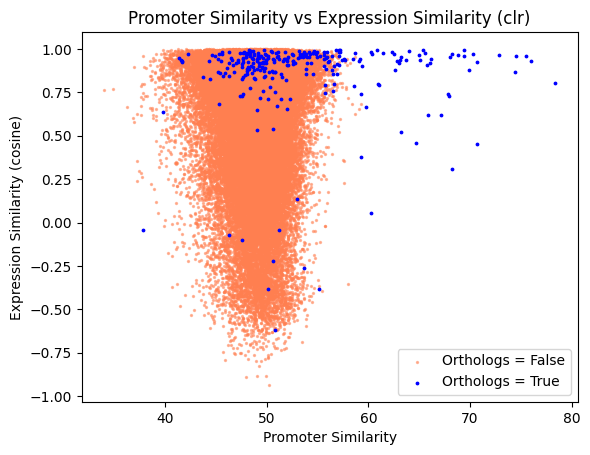

In [102]:
# Plot promoter similarity against expression similarity (scatter plot)
plt.figure()
plt.scatter(orthologs_false['promoter_identity'], orthologs_false['exp_sim_cosine'], s=2, alpha=0.5, c = 'coral')
plt.scatter(orthologs_true['promoter_identity'], orthologs_true['exp_sim_cosine'], s=3, alpha=1, c='blue')
plt.legend(['Orthologs = False', 'Orthologs = True'])
plt.xlabel('Promoter Similarity')
plt.ylabel('Expression Similarity (cosine)')
plt.title(f'Promoter Similarity vs Expression Similarity ({transform_method})')

plt.savefig(f'./plots/{family_id}_{transform_method}/promoter_vs_exp_sim_cosine.png', dpi=300, bbox_inches='tight')

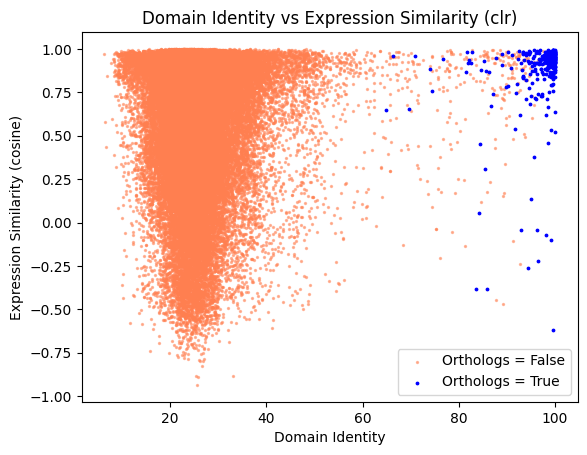

In [103]:
# Plot domain identity against expression similarity
plt.figure()
plt.scatter(orthologs_false['domain_identity'], orthologs_false['exp_sim_cosine'], s=2, alpha=0.5, c = 'coral')
plt.scatter(orthologs_true['domain_identity'], orthologs_true['exp_sim_cosine'], s=3, alpha=1, c='blue')
plt.legend(['Orthologs = False', 'Orthologs = True'])
plt.xlabel('Domain Identity')
plt.ylabel('Expression Similarity (cosine)')
plt.title(f'Domain Identity vs Expression Similarity ({transform_method})')

plt.savefig(f'./plots/{family_id}_{transform_method}/domain_vs_exp_sim_cosine.png', dpi=300, bbox_inches='tight')


Text(0.5, 1.0, 'Promoter Similarity vs Expression Similarity (clr)')

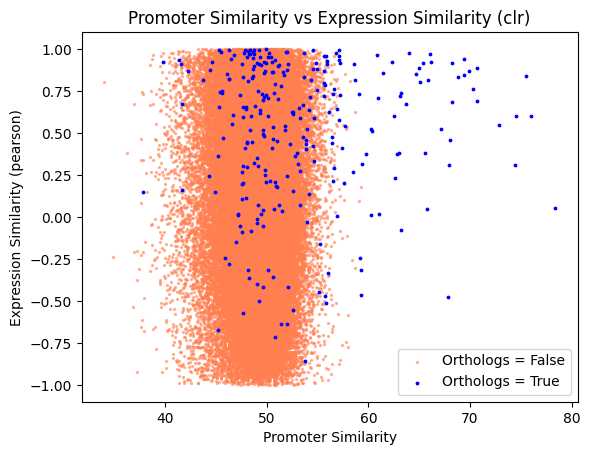

In [104]:
# Same plot but for x = promoter similarity y = expression similarity (pearson)
plt.figure()
plt.scatter(orthologs_false['promoter_identity'], orthologs_false['exp_sim_pearson'], s=2, alpha=0.5, c = "coral")
plt.scatter(orthologs_true['promoter_identity'], orthologs_true['exp_sim_pearson'], s=3, alpha=1, c='blue')
plt.legend(['Orthologs = False', 'Orthologs = True'])
plt.xlabel('Promoter Similarity')
plt.ylabel('Expression Similarity (pearson)')
plt.title(f'Promoter Similarity vs Expression Similarity ({transform_method})')

KS-test between orthologs and non-orthologs for expression similarity (cosine): t-statistic = 0.3663805780594102, p-value = 2.3096532370733527e-33
Orthologs True - Mean: 0.8529480277808216, Std: 0.23978720629799977
Orthologs False - Mean: 0.664106929866633, Std: 0.34168154321442307


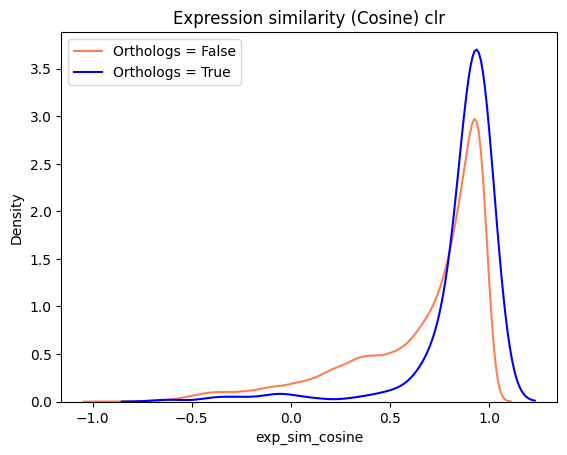

In [ ]:
# Same but with density plot (one curve for orthologs = True and one for orthologs = False)
plt.figure()
sns.kdeplot(orthologs_false['exp_sim_cosine'], color = "coral", label = "non-orthologs")
sns.kdeplot(orthologs_true['exp_sim_cosine'], color = "blue", label = "orthologs")
plt.legend(['Orthologs = False', 'Orthologs = True'])
plt.title(f'Expression similarity (Cosine) {transform_method}')

plt.savefig(f'./plots/{family_id}_{transform_method}/exp_sim_cosine_density.png', dpi=300, bbox_inches='tight')

# Compare both distributions using a t-test
ks_stat, ks_pval = stats.ks_2samp(orthologs_true['exp_sim_cosine'], orthologs_false['exp_sim_cosine'])
print(f"KS-test between orthologs and non-orthologs for expression similarity (cosine): t-statistic = {ks_stat}, p-value = {ks_pval}")

# Compare mean and standard deviation of expression similarity (cosine) for both groups
mean_true = orthologs_true['exp_sim_cosine'].mean()
mean_false = orthologs_false['exp_sim_cosine'].mean()
std_true = orthologs_true['exp_sim_cosine'].std()
std_false = orthologs_false['exp_sim_cosine'].std()
print(f"Orthologs True - Mean: {mean_true}, Std: {std_true}")
print(f"Orthologs False - Mean: {mean_false}, Std: {std_false}")


KS-test between orthologs and non-orthologs for promoter identity: t-statistic = 0.3864201491938718, p-value = 3.374671692593452e-37
Orthologs True - Mean: 53.37443825705746, Std: 7.16465000989568
Orthologs False - Mean: 49.02677709713295, Std: 2.3538250236760323


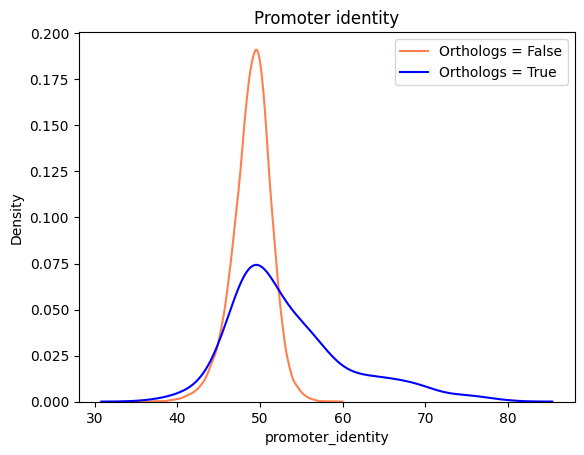

In [113]:
# Same for promoter identity
plt.figure()
sns.kdeplot(orthologs_false['promoter_identity'], color = "coral", label = "non-orthologs")
sns.kdeplot(orthologs_true['promoter_identity'], color = "blue", label = "orthologs")
plt.legend(['Orthologs = False', 'Orthologs = True'])
plt.title('Promoter identity')

plt.savefig(f'./plots/{family_id}_{transform_method}/promoter_identity_density.png', dpi=300, bbox_inches='tight')

# Compare both distributions using a ks-test
ks_stat, ks_pval = stats.ks_2samp(orthologs_true['promoter_identity'], orthologs_false['promoter_identity'])
print(f"KS-test between orthologs and non-orthologs for promoter identity: t-statistic = {ks_stat}, p-value = {ks_pval}")
# Compare mean and standard deviation of promoter identity for both groups
mean_true = orthologs_true['promoter_identity'].mean()
mean_false = orthologs_false['promoter_identity'].mean()
std_true = orthologs_true['promoter_identity'].std()
std_false = orthologs_false['promoter_identity'].std()
print(f"Orthologs True - Mean: {mean_true}, Std: {std_true}")
print(f"Orthologs False - Mean: {mean_false}, Std: {std_false}")        


KS-test between orthologs and non-orthologs for expression similarity (pearson): t-statistic = 0.2907809951605572, p-value = 6.126872218316006e-21
Orthologs True - Mean: 0.50883600993544, Std: 0.43308811444363077
Orthologs False - Mean: 0.1751744044550257, Std: 0.49980267085050545


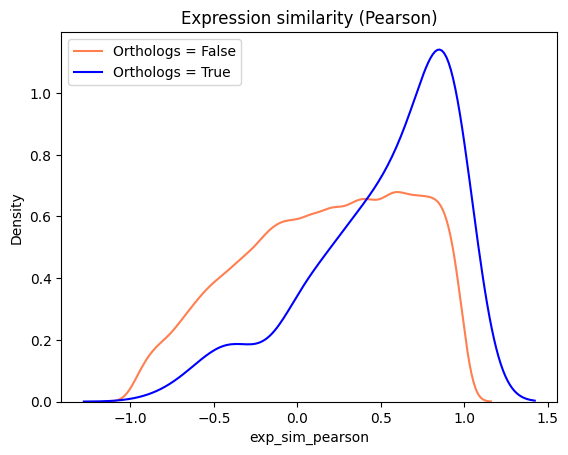

In [114]:
# Same for expression similarity (pearson)
plt.figure()
sns.kdeplot(orthologs_false['exp_sim_pearson'], color = "coral", label = "non-orthologs")
sns.kdeplot(orthologs_true['exp_sim_pearson'], color = "blue", label = "orthologs")
plt.legend(['Orthologs = False', 'Orthologs = True'])
plt.title('Expression similarity (Pearson)')

plt.savefig(f'./plots/{family_id}_{transform_method}/exp_sim_pearson_density.png', dpi=300, bbox_inches='tight')

# Compare both distributions using a ks-test
ks_stat, ks_pval = stats.ks_2samp(orthologs_true['exp_sim_pearson'], orthologs_false['exp_sim_pearson'])
print(f"KS-test between orthologs and non-orthologs for expression similarity (pearson): t-statistic = {ks_stat}, p-value = {ks_pval}")
# Compare mean and standard deviation of expression similarity (pearson) for both groups
mean_true = orthologs_true['exp_sim_pearson'].mean()
mean_false = orthologs_false['exp_sim_pearson'].mean()
std_true = orthologs_true['exp_sim_pearson'].std()
std_false = orthologs_false['exp_sim_pearson'].std()
print(f"Orthologs True - Mean: {mean_true}, Std: {std_true}")
print(f"Orthologs False - Mean: {mean_false}, Std: {std_false}")    



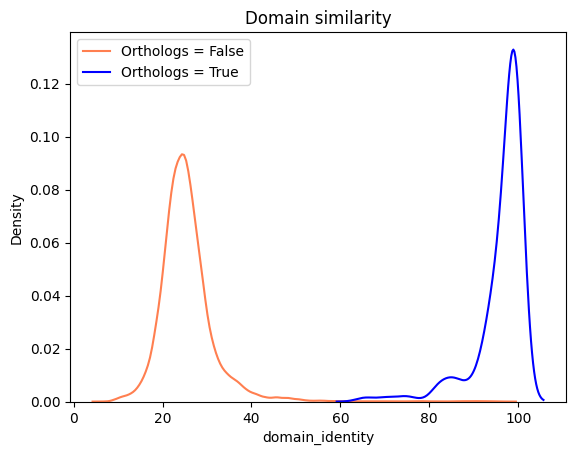

In [115]:
# Same for domain similarity 
plt.figure()
sns.kdeplot(orthologs_false['domain_identity'], color = "coral", label = "non-orthologs")
sns.kdeplot(orthologs_true['domain_identity'], color = "blue", label = "orthologs")
plt.legend(['Orthologs = False', 'Orthologs = True'])
plt.title('Domain similarity')

plt.savefig(f'./plots/{family_id}_{transform_method}/domain_identity_density.png', dpi=300, bbox_inches='tight')


In [116]:
# Write some important statistics to a file
output_file = f'./results/{family_id}_{transform_method}_statistics.txt'

text = f"""
Statistics for {family_id} family and {transform_method} transformation
Number of orthologs = True: {orthologs_true.shape[0]}
Number of orthologs = False: {orthologs_false.shape[0]}
Max pearson similarity: {combined_df['exp_sim_pearson'].max()}
Max cosine similarity: {combined_df['exp_sim_cosine'].max()}
Max promoter identity: {combined_df['promoter_identity'].max()}

Mean pearson similarity (orthologs = True): {orthologs_true['exp_sim_pearson'].mean()}
Mean pearson similarity (orthologs = False): {orthologs_false['exp_sim_pearson'].mean()}

Mean cosine similarity (orthologs = True): {orthologs_true['exp_sim_cosine'].mean()}
Mean cosine similarity (orthologs = False): {orthologs_false['exp_sim_cosine'].mean()}

Mean promoter identity (orthologs = True): {orthologs_true['promoter_identity'].mean()}
Mean promoter identity (orthologs = False): {orthologs_false['promoter_identity'].mean()}

Correlation between promoter identity and expression similarity (pearson): {combined_df['promoter_identity'].corr(combined_df['exp_sim_pearson'])}
Correlation between promoter identity and expression similarity (cosine): {combined_df['promoter_identity'].corr(combined_df['exp_sim_cosine'])}

Correlation between domain identity and expression similarity (pearson): {combined_df['domain_identity'].corr(combined_df['exp_sim_pearson'])}
Correlation between domain identity and expression similarity (cosine): {combined_df['domain_identity'].corr(combined_df['exp_sim_cosine'])}
"""

with open(output_file, 'w') as f:
    f.write(text)

print(text)



Statistics for kinase family and clr transformation
Number of orthologs = True: 274
Number of orthologs = False: 74802
Max pearson similarity: 0.999603158138685
Max cosine similarity: 0.999821880807129
Max promoter identity: 78.36812144212524

Mean pearson similarity (orthologs = True): 0.50883600993544
Mean pearson similarity (orthologs = False): 0.1751744044550257

Mean cosine similarity (orthologs = True): 0.8529480277808216
Mean cosine similarity (orthologs = False): 0.664106929866633

Mean promoter identity (orthologs = True): 53.37443825705746
Mean promoter identity (orthologs = False): 49.02677709713295

Correlation between promoter identity and expression similarity (pearson): 0.007873649504204265
Correlation between promoter identity and expression similarity (cosine): 0.011561274289346953

Correlation between domain identity and expression similarity (pearson): 0.041638679266242984
Correlation between domain identity and expression similarity (cosine): 0.006250158840780794



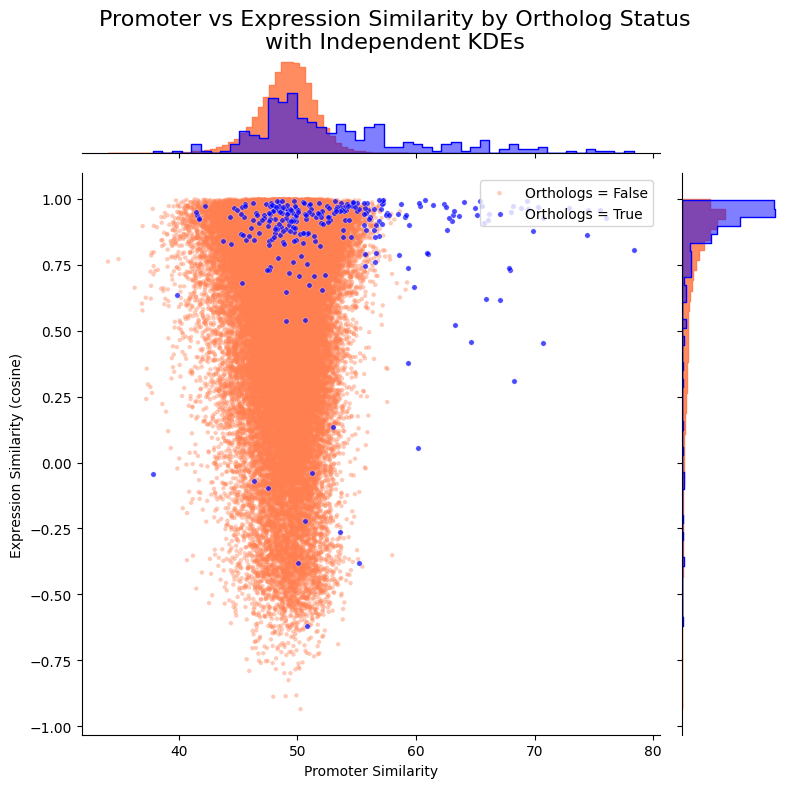

In [117]:

# COMBINED PLOT WITH KDEs AND HISTOGRAMS
# Create JointGrid manually
g = sns.JointGrid(data=combined_df, x="promoter_identity", y="exp_sim_cosine", height=8)

# Split the dataframe
df_true = combined_df[combined_df['orthologs'] == True]
df_false = combined_df[combined_df['orthologs'] == False]

# Scatter plots
sns.scatterplot(data=df_false, x="promoter_identity", y="exp_sim_cosine",
                color="coral", alpha=0.4, s=10, label="Orthologs = False", ax=g.ax_joint, edgecolor = 'None')

sns.scatterplot(data=df_true, x="promoter_identity", y="exp_sim_cosine",
                color="blue", alpha=0.7, s=15, label="Orthologs = True", ax=g.ax_joint)

# Top marginal histograms
sns.histplot(data=df_false, x="promoter_identity", ax=g.ax_marg_x,
             bins=50, stat="density", color="coral", element="step", fill=True, alpha=0.9)

sns.histplot(data=df_true, x="promoter_identity", ax=g.ax_marg_x,
             bins=50, stat="density", color="blue", element="step", fill=True, alpha=0.5)

# Right marginal histograms
sns.histplot(data=df_false, y="exp_sim_cosine", ax=g.ax_marg_y,
             bins=50, stat="density", color="coral", element="step", fill=True, alpha=0.9)

sns.histplot(data=df_true, y="exp_sim_cosine", ax=g.ax_marg_y,
             bins=50, stat="density", color="blue", element="step", fill=True, alpha=0.5)

# Flip the side histogram to align visually

# Labels & Legend
g.ax_joint.set_xlabel("Promoter Similarity")
g.ax_joint.set_ylabel("Expression Similarity (cosine)")
g.ax_joint.legend(loc="upper right")

plt.suptitle("Promoter vs Expression Similarity by Ortholog Status\nwith Independent KDEs", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

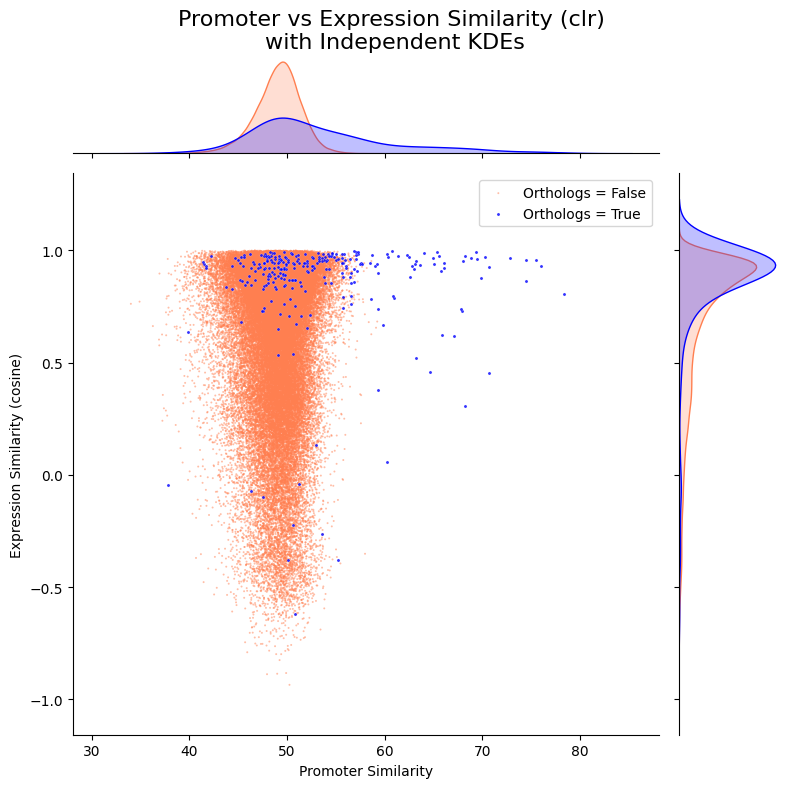

In [118]:
# Create JointGrid manually
g = sns.JointGrid(data=combined_df, x="promoter_identity", y="exp_sim_cosine", height=8)

# Split the dataframe
df_true = combined_df[combined_df['orthologs'] == True]
df_false = combined_df[combined_df['orthologs'] == False]

# Scatter plots
sns.scatterplot(data=df_false, x="promoter_identity", y="exp_sim_cosine",
                color="coral", alpha=0.5, s=2, label="Orthologs = False", ax=g.ax_joint, edgecolor = 'None')

sns.scatterplot(data=df_true, x="promoter_identity", y="exp_sim_cosine",
                color="blue", alpha=0.8, s=5, label="Orthologs = True", ax=g.ax_joint)

# KDEs — normalized *independently*
sns.kdeplot(data=df_false, x="promoter_identity", ax=g.ax_marg_x,
            fill=True, color="coral", common_norm=False)

sns.kdeplot(data=df_true, x="promoter_identity", ax=g.ax_marg_x,
            fill=True, color="blue", common_norm=False)

sns.kdeplot(data=df_false, y="exp_sim_cosine", ax=g.ax_marg_y,
            fill=True, color="coral", common_norm=False)

sns.kdeplot(data=df_true, y="exp_sim_cosine", ax=g.ax_marg_y,
            fill=True, color="blue", common_norm=False)


# Flip the side histogram to align visually

# Labels & Legend
g.ax_joint.set_xlabel("Promoter Similarity")
g.ax_joint.set_ylabel("Expression Similarity (cosine)")
g.ax_joint.legend(loc="upper right")

plt.suptitle(f"Promoter vs Expression Similarity ({transform_method}) \nwith Independent KDEs", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# What can we say about these plots?
In general, it alignes with the expected results: very high promoter similarity is informative of high expression similarity (as it is the case in some orthologs), but from 40-60% promoter similarity (where the big majority of the pairs are), sequence identity is not longer correlated with expression similarity. 

The idea is to obtain an alternative representation of the promoter sequence that is more informative (better correlated) with the expression similarity. 

Orthologs are a nice ground truth, but we need a bigger set of positives (and negatives) for training. 
There are multiple ways of defining them (top/bottom, threshold, etc.). See *pos_neg.ipynb* for further analysis. 


Regarding the expression similarity, the vast majority of pairs show high expression similarity both for orthologs and non-orthologs, with little (absolute) difference in the mode of both distributions. This is not exactly what we would like. We would like to confirm that the way we are measuring expression similarity is able to describe the expression profile properly. 

# Individual analysis of expression similarity
Now that we have a general understanding of what is going on, it would be interesting to make sure that the signal is there and it is not a technical artifact. 
Specifically, we want to see if: 
1. Those pairs with low expression similarity have in fact a distinct expression pattern across tissues (very high and very low in different ones)
2. If very low expression (< 1 or 2 tpm) results in high or low similarity. It should not be high, as it is not informative. 
3. The orthologs (same gene pairs) with low expression similarity --> what is happening? 

Regarding the embeddings: 
- If the low embedding similarity corresponds to low expression, as Matthys was suggesting. 


In [162]:
# Load the expression file and merge with orthologs data
human_exp = pd.read_csv(f'../data/expression/human/merged_human_data.tsv', sep='\t', index_col=0)
mouse_exp = pd.read_csv(f'../data/expression/mouse/merged_mouse_data.tsv', sep='\t', index_col=0)

# merge the orthologs_true with the human and mouse expression data
orthologs_true_exp = orthologs_true.merge(human_exp, left_on='gene_id_human', right_index=True, suffixes=('', '_human'))
orthologs_true_exp = orthologs_true_exp.merge(mouse_exp, left_on='gene_id_mouse', right_index=True, suffixes=('', '_mouse'))

orthologs_false_exp = orthologs_false.merge(human_exp, left_on='gene_id_human', right_index=True, suffixes=('', '_human'))
orthologs_false_exp = orthologs_false_exp.merge(mouse_exp, left_on='gene_id_mouse', right_index=True, suffixes=('', '_mouse'))

In [158]:
# Sort orthologs_true_exp by expression similarity (cosine)
orthologs_true_exp = orthologs_true_exp.sort_values(by='exp_sim_cosine', ascending=False)
orthologs_lowsim_tpm = orthologs_true_exp[orthologs_true_exp['exp_sim_cosine'] < 0.5]
orthologs_highsim_tpm = orthologs_true_exp[orthologs_true_exp['exp_sim_cosine'] >= 0.985]

print(f"Number of orthologs with low expression similarity (cosine) < 0.5: {orthologs_lowsim_tpm.shape[0]}")
print(f"Number of orthologs with high expression similarity (cosine) >= 0.985: {orthologs_highsim_tpm.shape[0]}")


Number of orthologs with low expression similarity (cosine) < 0.5: 15
Number of orthologs with high expression similarity (cosine) >= 0.985: 14


In [169]:
# Centered log-ratio transformation
human_exp_t = human_exp.T  # Transpose: Rows are samples and genes are columns
mouse_exp_t = mouse_exp.T

def clr(row):
    logs = np.log(row + 1)
    return logs - logs.mean()

# rows = samples, columns = genes → apply with axis=1
human_transformed = human_exp_t.apply(clr, axis=1).T
mouse_transformed = mouse_exp_t.apply(clr, axis=1).T


orthologs_true_transformed = orthologs_true.merge(human_transformed, left_on='gene_id_human', right_index=True, suffixes=('', '_human_transformed'))
orthologs_true_transformed = orthologs_true_transformed.merge(mouse_transformed, left_on='gene_id_mouse', right_index=True, suffixes=('', '_mouse_transformed'))

orthologs_true_transformed = orthologs_true_transformed.sort_values(by='exp_sim_cosine', ascending=False)
orthologs_lowsim_transformed = orthologs_true_transformed[orthologs_true_transformed['exp_sim_cosine'] < 0.5]
orthologs_highsim_transformed = orthologs_true_transformed[orthologs_true_transformed['exp_sim_cosine'] >= 0.985]

print(f"Number of orthologs with low expression similarity (transformed) < 0.5: {orthologs_lowsim_transformed.shape[0]}")
print(f"Number of orthologs with high expression similarity (transformed) >= 0.985: {orthologs_highsim_transformed.shape[0]}")


Number of orthologs with low expression similarity (transformed) < 0.5: 15
Number of orthologs with high expression similarity (transformed) >= 0.985: 14


In [184]:
# Obtain a simplified version of the expression data that calculates the mean expression for each gene across all samples and in each tissue indicates whether the expression is higher (1) or lower (-1) than the average
def simplify_expression_data(df):
    # Calculate the mean expression for each gene across all samples
    mean_expression = df.mean(axis=1)
    
    # Create a simplified DataFrame with the mean expression
    simplified_df = pd.DataFrame(index=df.index)
    simplified_df['mean_expression'] = mean_expression
    
    # Add 5 columns (one for each tissue) indicating whether the expression is higher (1) or lower (-1) than the mean expression
    tissues = ["heart_tpm", "adrenal gland_tpm", "liver_tpm", "muscle_tpm", "brain_tpm"]
    for tissue in tissues:
        if tissue in df.columns:
            simplified_df[tissue] = np.where(df[tissue] > mean_expression, 1, -1)
        else:
            simplified_df[tissue] = np.nan
    
    return simplified_df

human_simplified = simplify_expression_data(human_transformed)
mouse_simplified = simplify_expression_data(mouse_transformed)  



In [185]:
# Create the simplified orthologs_true DataFrame with the simplified expression data
orthologs_true_simplified = orthologs_true.merge(human_simplified, left_on='gene_id_human', right_index=True, suffixes=('', '_human_simplified'))
orthologs_true_simplified = orthologs_true_simplified.merge(mouse_simplified, left_on='gene_id_mouse', right_index=True, suffixes=('', '_mouse_simplified'))

# Sort the DataFrame by expression similarity (cosine)
orthologs_true_simplified = orthologs_true_simplified.sort_values(by='exp_sim_cosine', ascending=False)

orthologs_lowsim_simplified = orthologs_true_simplified[orthologs_true_simplified['exp_sim_cosine'] < 0.5]
orthologs_highsim_simplified = orthologs_true_simplified[orthologs_true_simplified['exp_sim_cosine'] >= 0.985]


In [188]:
orthologs_lowsim_simplified.head()

,gene_id_human,gene_id_mouse,gene_name_human,gene_name_mouse,orthologs,exp_sim_cosine,exp_sim_pearson,promoter_identity,domain_identity,mean_expression,...,adrenal gland_tpm,liver_tpm,muscle_tpm,brain_tpm,mean_expression_mouse_simplified,heart_tpm_mouse_simplified,adrenal gland_tpm_mouse_simplified,liver_tpm_mouse_simplified,muscle_tpm_mouse_simplified,brain_tpm_mouse_simplified
33550,ENSG00000108984,ENSMUSG00000020623,MAP2K6,MAP2K6,True,0.455984,0.851447,64.640884,98.473282,-0.010917,...,-1,-1,1,-1,1.303931,-1,-1,-1,1,1
30800,ENSG00000167524,ENSMUSG00000037593,RSKR,RSKR,True,0.455048,0.883718,70.676692,84.357542,0.746185,...,-1,-1,1,1,0.073368,-1,-1,-1,-1,1
10725,ENSG00000166483,ENSMUSG00000031016,WEE1,WEE1,True,0.375821,-0.465851,59.292035,95.571956,0.521344,...,-1,1,-1,-1,0.902700,1,-1,-1,-1,1
40150,ENSG00000187550,ENSMUSG00000030433,SBK2,SBK2,True,0.308065,0.682064,68.274583,85.501859,-0.254316,...,-1,-1,1,-1,0.925118,1,-1,-1,1,-1
19250,ENSG00000100490,ENSMUSG00000020990,CDKL1,CDKL1,True,0.134809,0.380546,53.014184,95.070423,-0.044198,...,1,-1,1,1,0.754124,1,-1,-1,-1,1


## For the 3 aspect: lower expression similarity in orthologs
We want to see if the orthologs that have lower expression similarity make sense or is just some technical stuff. 

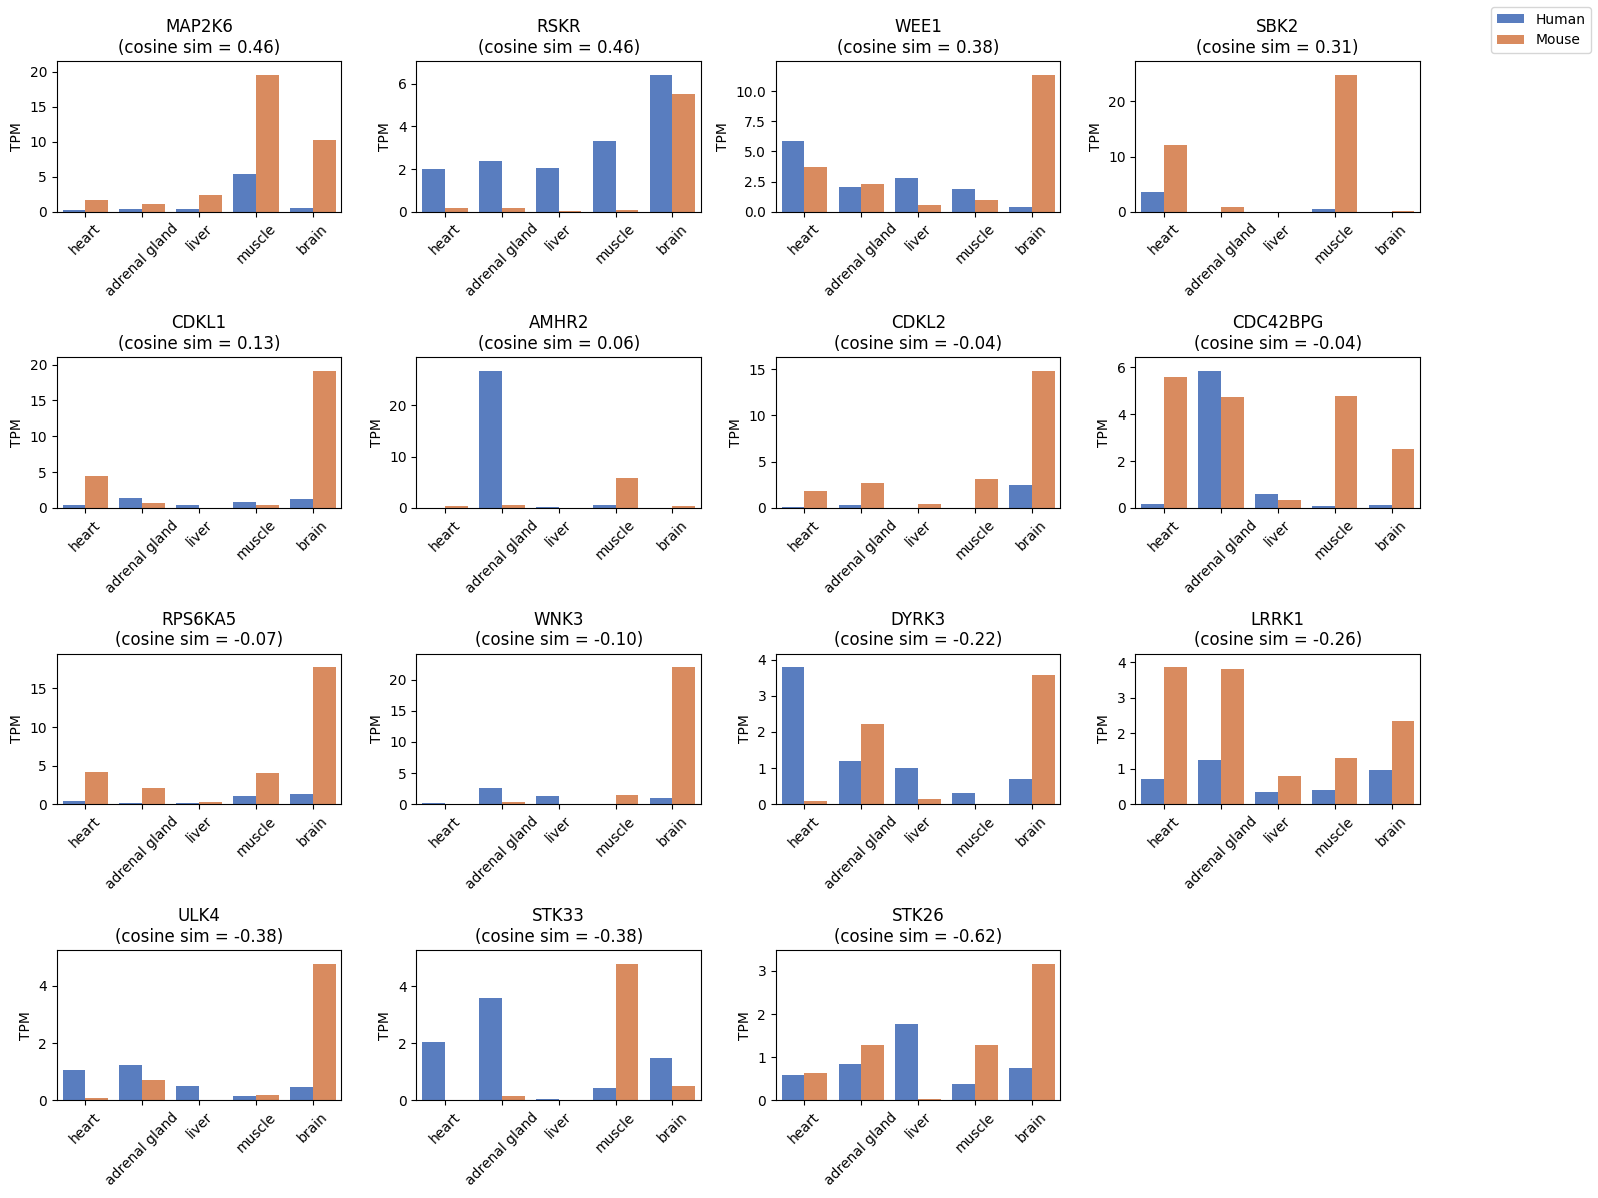

<Figure size 640x480 with 0 Axes>

In [159]:
# Plot expression of genes with low similarity (tpm)
orthologs_lowsim = orthologs_lowsim_tpm.copy()

# assume orthologs_lowsim is your DataFrame of 15 genes
tissues = ["heart", "adrenal gland", "liver", "muscle", "brain"]
n_genes = len(orthologs_lowsim)
ncols = 4
nrows = (n_genes + ncols - 1) // ncols  # =4
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3), squeeze=False)
axes = axes.flatten()

for ax, (_, row) in zip(axes, orthologs_lowsim.iterrows()):
    gene = row["gene_name_human"]
    sim  = row["exp_sim_cosine"]
    
    # build per‐gene long DataFrame
    human_df = pd.DataFrame({
        "tissue": tissues,
        "TPM":    [row[f"{t}_tpm"] for t in tissues],
        "species": "Human"
    })
    mouse_df = pd.DataFrame({
        "tissue": tissues,
        "TPM":    [row[f"{t}_tpm_mouse"] for t in tissues],
        "species": "Mouse"
    })
    plot_df = pd.concat([human_df, mouse_df], ignore_index=True)
    
    sns.barplot(data=plot_df, x="tissue", y="TPM", hue="species", ax=ax, palette="muted")
    ax.set_title(f"{gene}\n(cosine sim = {sim:.2f})")
    ax.set_xlabel("")
    ax.set_ylabel("TPM")
    ax.set_ylim(0, plot_df["TPM"].max()*1.1)
    ax.tick_params(axis="x", rotation=45, labelsize=10)
    ax.legend_.remove()   # optionally remove inner legend

# hide any unused axes (e.g. the 16th slot)
for ax in axes[n_genes:]:
    ax.set_visible(False)

# add one legend for all
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right")
plt.tight_layout(rect=[0,0,0.9,1])  # leave room for the legend
plt.show()

# Save the plot
plt.savefig(f'./plots/{family_id}_{transform_method}/orthologs_lowsim_expression_similarity.png', dpi=300, bbox_inches='tight')


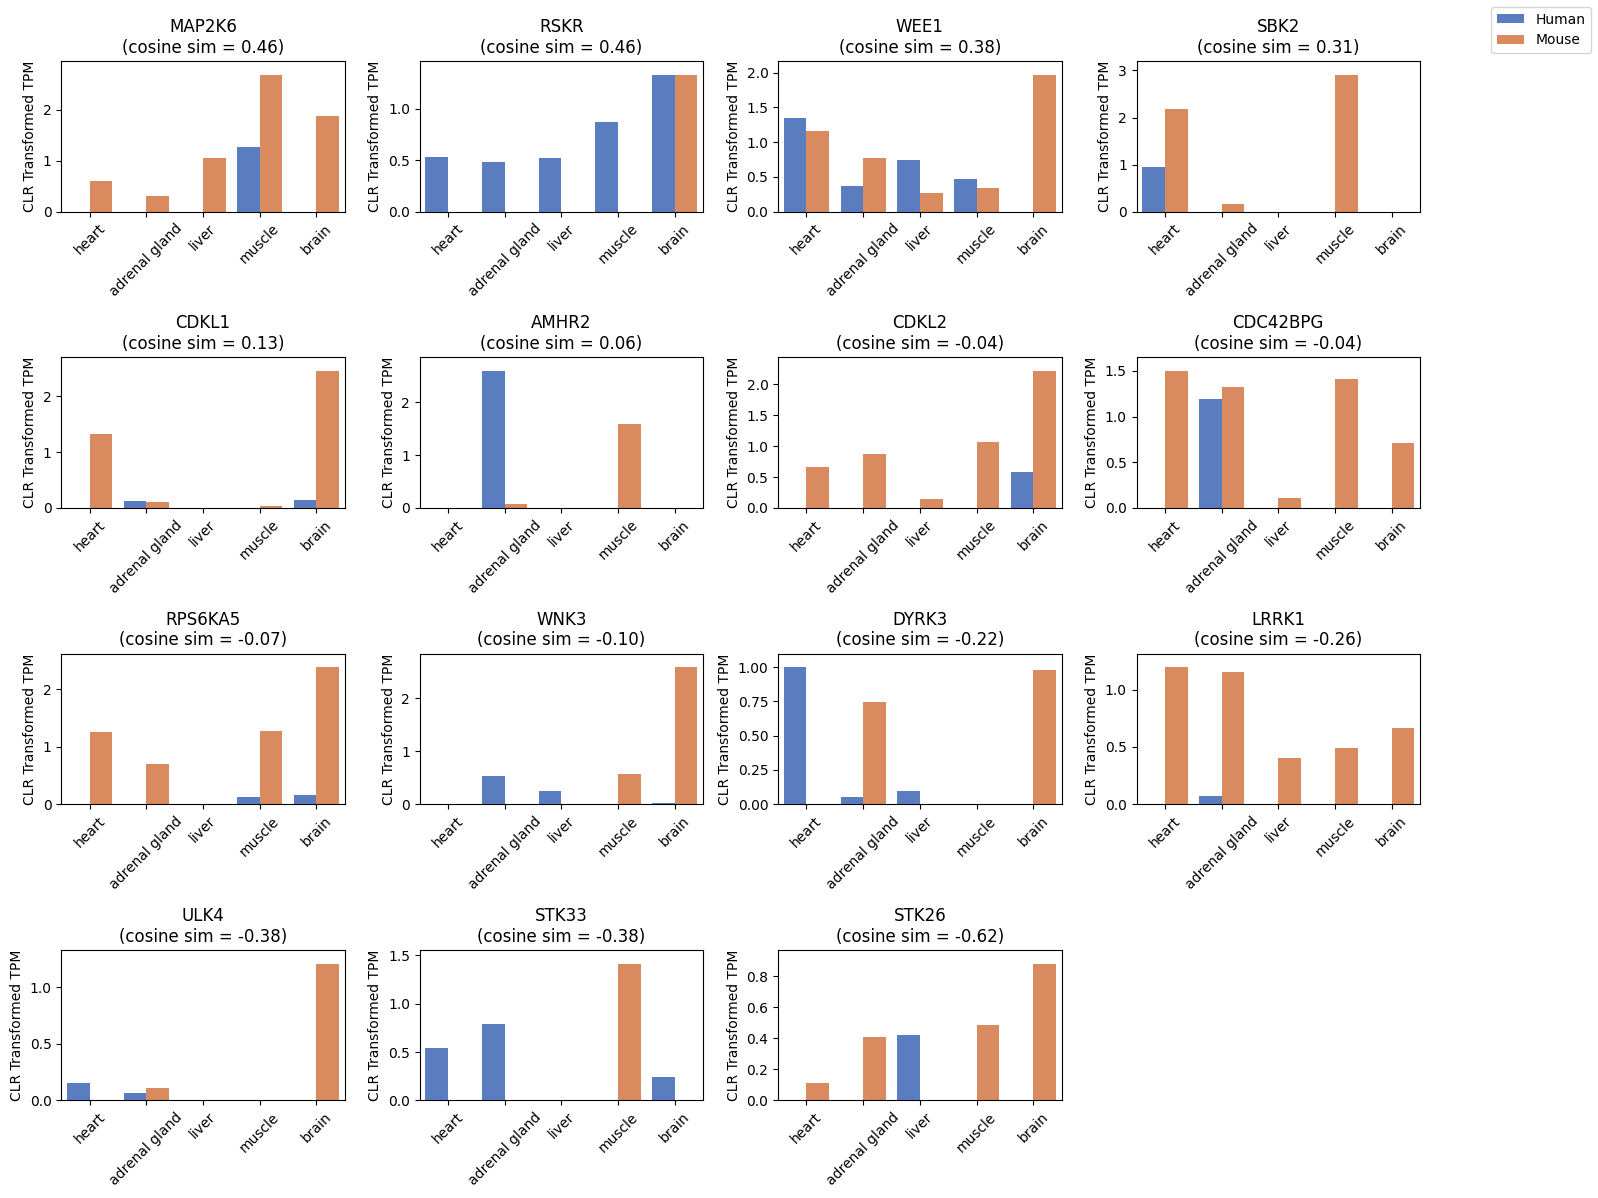

<Figure size 640x480 with 0 Axes>

In [171]:
# Plot expression of genes with LOW similarity (transformed with clr)
orthologs_lowsim = orthologs_lowsim_transformed.copy()

# assume orthologs_lowsim is your DataFrame of 15 genes
tissues = ["heart", "adrenal gland", "liver", "muscle", "brain"]
n_genes = len(orthologs_lowsim)
ncols = 4
nrows = (n_genes + ncols - 1) // ncols  # =4
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3), squeeze=False)
axes = axes.flatten()

for ax, (_, row) in zip(axes, orthologs_lowsim.iterrows()):
    gene = row["gene_name_human"]
    sim  = row["exp_sim_cosine"]
    
    # build per‐gene long DataFrame
    human_df = pd.DataFrame({
        "tissue": tissues,
        "TPM":    [row[f"{t}_tpm"] for t in tissues],
        "species": "Human"
    })
    mouse_df = pd.DataFrame({
        "tissue": tissues,
        "TPM":    [row[f"{t}_tpm_mouse_transformed"] for t in tissues],
        "species": "Mouse"
    })
    plot_df = pd.concat([human_df, mouse_df], ignore_index=True)
    
    sns.barplot(data=plot_df, x="tissue", y="TPM", hue="species", ax=ax, palette="muted")
    ax.set_title(f"{gene}\n(cosine sim = {sim:.2f})")
    ax.set_xlabel("")
    ax.set_ylabel("CLR Transformed TPM")
    ax.set_ylim(0, plot_df["TPM"].max()*1.1)
    ax.tick_params(axis="x", rotation=45, labelsize=10)
    ax.legend_.remove()   # optionally remove inner legend

# hide any unused axes (e.g. the 16th slot)
for ax in axes[n_genes:]:
    ax.set_visible(False)

# add one legend for all
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right")
plt.tight_layout(rect=[0,0,0.9,1])  # leave room for the legend
plt.show()

# Save the plot
plt.savefig(f'./plots/{family_id}_{transform_method}/orthologs_lowsim_expression_similarity.png', dpi=300, bbox_inches='tight')


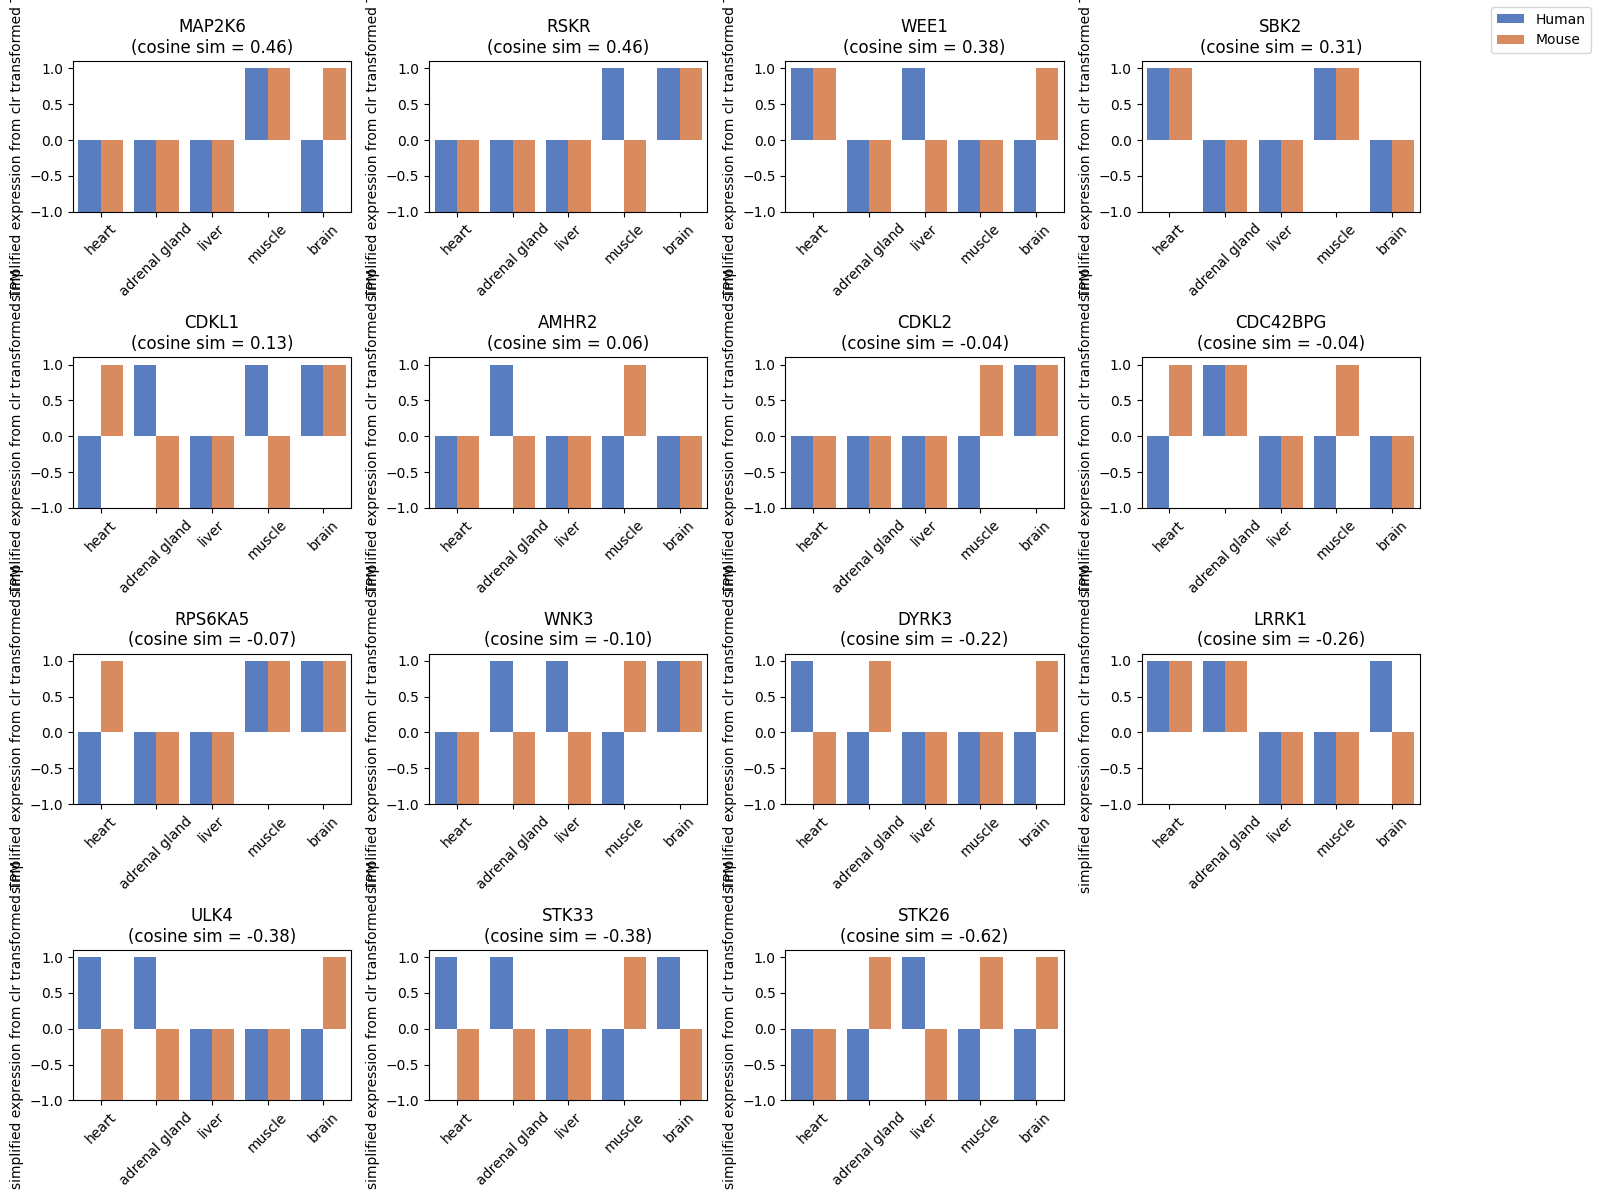

<Figure size 640x480 with 0 Axes>

In [189]:
# FOR THE SIMPLIFIED EXPRESSION DATA
# Plot expression of genes with low similarity (tpm)
orthologs_lowsim = orthologs_lowsim_simplified.copy()

# assume orthologs_lowsim is your DataFrame of 15 genes
tissues = ["heart", "adrenal gland", "liver", "muscle", "brain"]
n_genes = len(orthologs_lowsim)
ncols = 4
nrows = (n_genes + ncols - 1) // ncols  # =4
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3), squeeze=False)
axes = axes.flatten()

for ax, (_, row) in zip(axes, orthologs_lowsim.iterrows()):
    gene = row["gene_name_human"]
    sim  = row["exp_sim_cosine"]
    
    # build per‐gene long DataFrame
    human_df = pd.DataFrame({
        "tissue": tissues,
        "TPM":    [row[f"{t}_tpm"] for t in tissues],
        "species": "Human"
    })
    mouse_df = pd.DataFrame({
        "tissue": tissues,
        "TPM":    [row[f"{t}_tpm_mouse_simplified"] for t in tissues],
        "species": "Mouse"
    })
    plot_df = pd.concat([human_df, mouse_df], ignore_index=True)
    
    sns.barplot(data=plot_df, x="tissue", y="TPM", hue="species", ax=ax, palette="muted")
    ax.set_title(f"{gene}\n(cosine sim = {sim:.2f})")
    ax.set_xlabel("")
    ax.set_ylabel("simplified expression from clr transformed TPM")
    ax.set_ylim(-1, plot_df["TPM"].max()*1.1)
    ax.tick_params(axis="x", rotation=45, labelsize=10)
    ax.legend_.remove()   # optionally remove inner legend

# hide any unused axes (e.g. the 16th slot)
for ax in axes[n_genes:]:
    ax.set_visible(False)

# add one legend for all
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right")
plt.tight_layout(rect=[0,0,0.9,1])  # leave room for the legend
plt.show()

# Save the plot
plt.savefig(f'./plots/{family_id}_{transform_method}/orthologs_lowsim_expression_similarity.png', dpi=300, bbox_inches='tight')


Number of orthologs with high expression similarity (cosine) > 0.98: 14


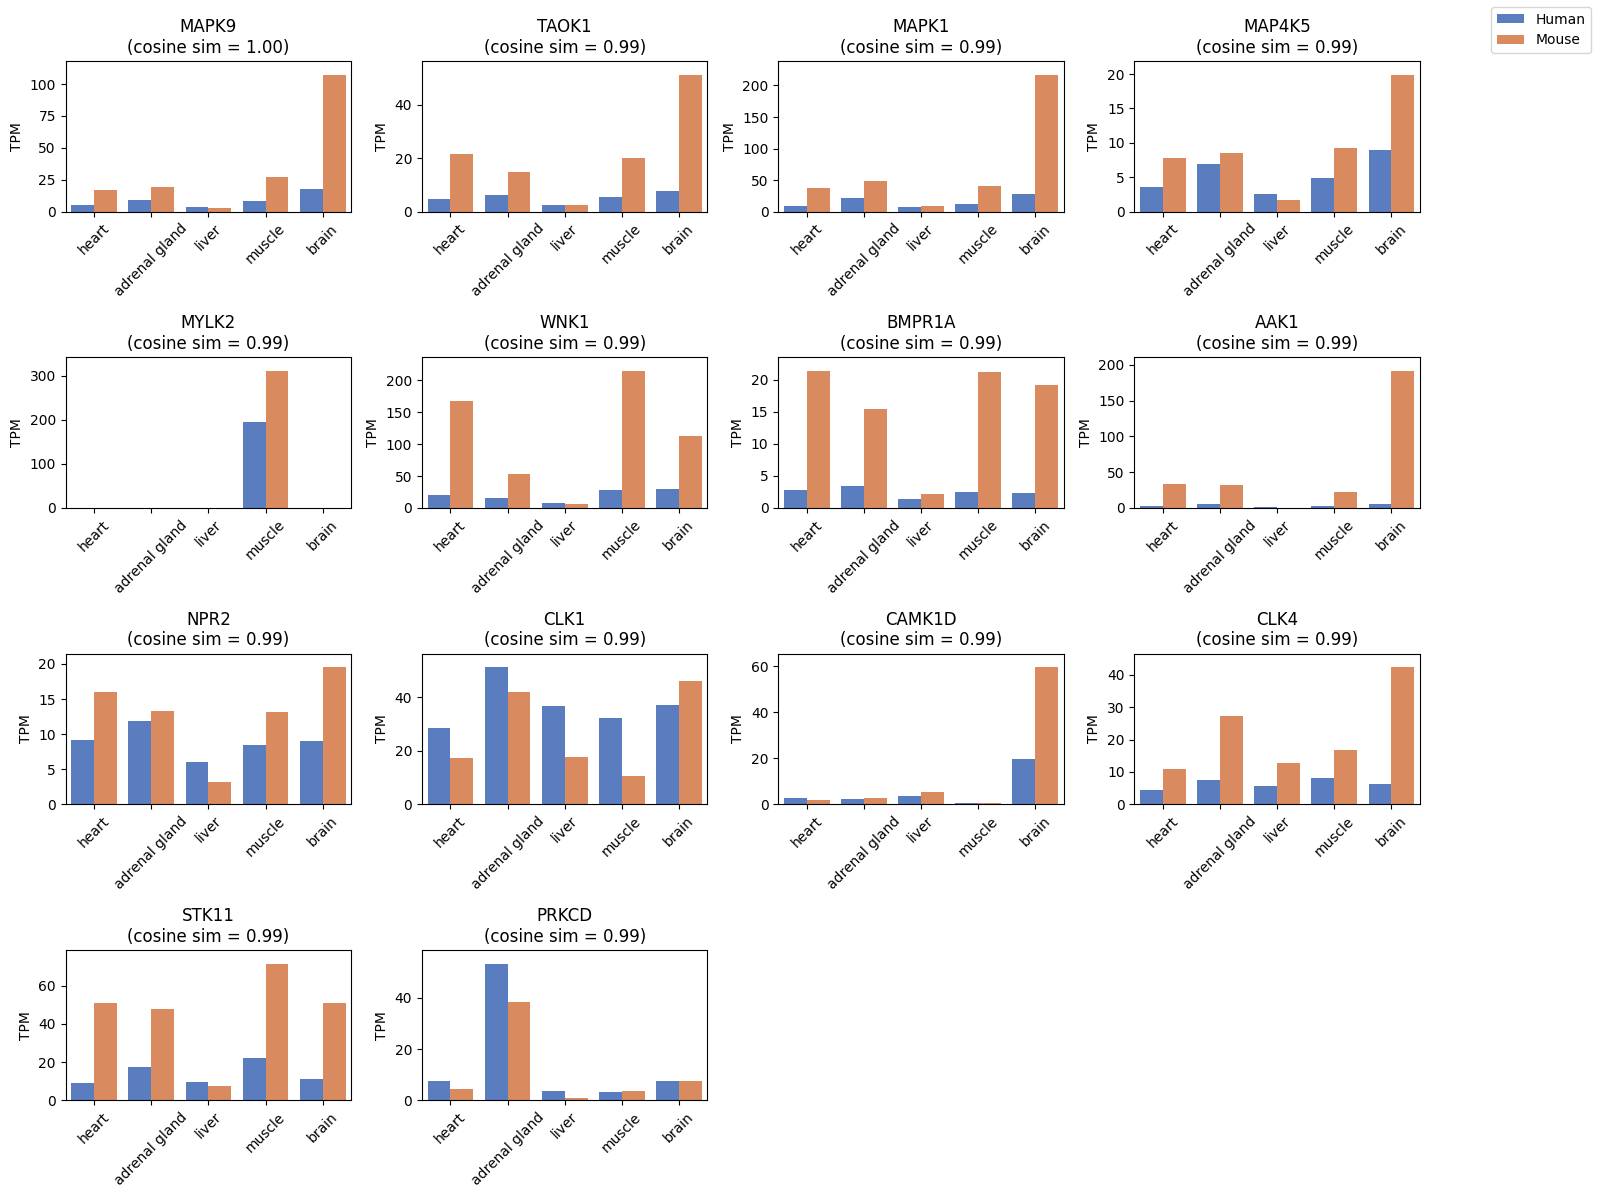

<Figure size 640x480 with 0 Axes>

In [ ]:
# Repeat with the most 15 similar orthologs
orthologs_highsim = orthologs_highsim_tpm.copy()
print(f"Number of orthologs with high expression similarity (cosine) > 0.98: {orthologs_highsim.shape[0]}")

# assume orthologs_highsim is your DataFrame of 15 genes
tissues = ["heart", "adrenal gland", "liver", "muscle", "brain"]
n_genes = len(orthologs_highsim)
ncols = 4
nrows = (n_genes + ncols - 1) // ncols  # =4
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3), squeeze=False)
axes = axes.flatten()

for ax, (_, row) in zip(axes, orthologs_highsim.iterrows()):
    gene = row["gene_name_human"]
    sim  = row["exp_sim_cosine"]
    
    # build per‐gene long DataFrame
    human_df = pd.DataFrame({
        "tissue": tissues,
        "TPM":    [row[f"{t}_tpm"] for t in tissues],
        "species": "Human"
    })
    mouse_df = pd.DataFrame({
        "tissue": tissues,
        "TPM":    [row[f"{t}_tpm_mouse"] for t in tissues],
        "species": "Mouse"
    })
    plot_df = pd.concat([human_df, mouse_df], ignore_index=True)
    
    sns.barplot(data=plot_df, x="tissue", y="TPM", hue="species", ax=ax, palette="muted")
    ax.set_title(f"{gene}\n(cosine sim = {sim:.2f})")
    ax.set_xlabel("")
    ax.set_ylabel("TPM")
    ax.set_ylim(0, plot_df["TPM"].max()*1.1)
    ax.tick_params(axis="x", rotation=45, labelsize=10)
    ax.legend_.remove()   # optionally remove inner legend

# hide any unused axes (e.g. the 16th slot)
for ax in axes[n_genes:]:
    ax.set_visible(False)

# add one legend for all
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right")
plt.tight_layout(rect=[0,0,0.9,1])  # leave room for the legend
plt.show()

# Save the plot
plt.savefig(f'./plots/{family_id}_{transform_method}/orthologs_highsim_expression_similarity.png', dpi=300, bbox_inches='tight')

Number of orthologs with high expression similarity (cosine) > 0.98: 14


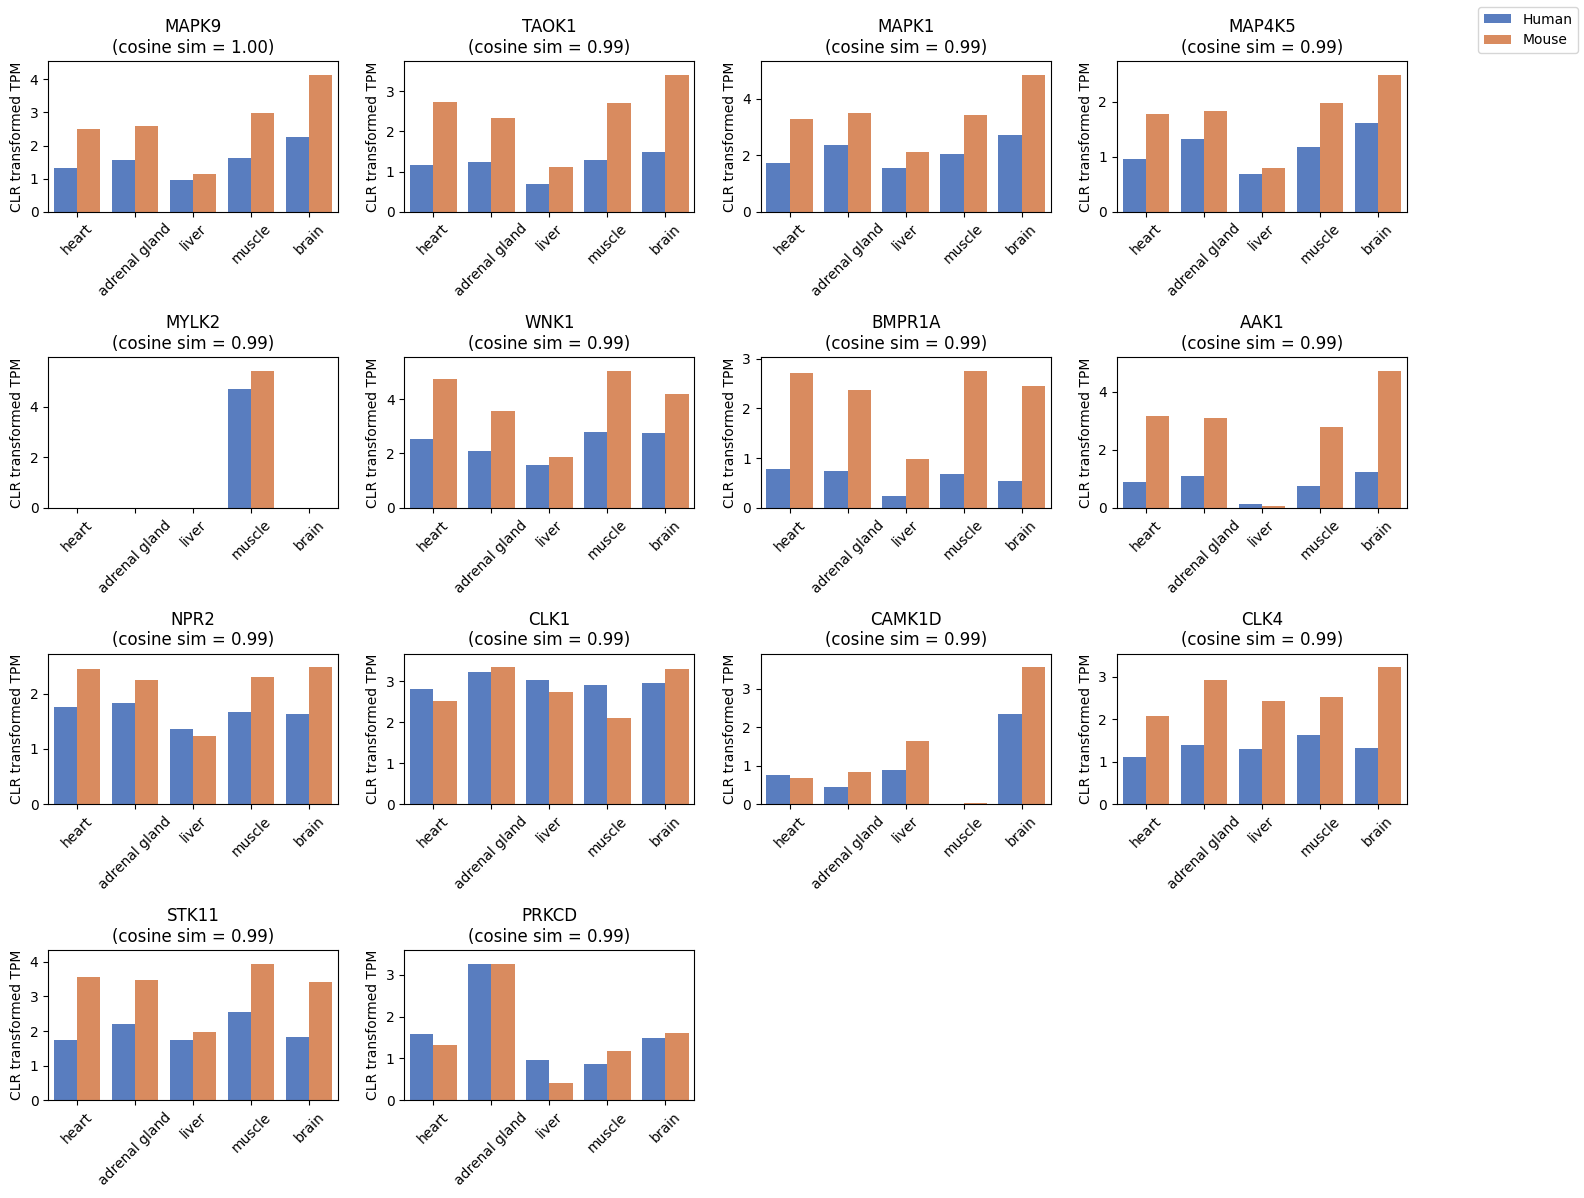

<Figure size 640x480 with 0 Axes>

In [173]:
# Orthologs high similarity (transformed with clr)
orthologs_highsim = orthologs_highsim_transformed.copy()

print(f"Number of orthologs with high expression similarity (cosine) > 0.98: {orthologs_highsim.shape[0]}")

# assume orthologs_highsim is your DataFrame of 15 genes
tissues = ["heart", "adrenal gland", "liver", "muscle", "brain"]
n_genes = len(orthologs_highsim)
ncols = 4
nrows = (n_genes + ncols - 1) // ncols  # =4
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3), squeeze=False)
axes = axes.flatten()

for ax, (_, row) in zip(axes, orthologs_highsim.iterrows()):
    gene = row["gene_name_human"]
    sim  = row["exp_sim_cosine"]
    
    # build per‐gene long DataFrame
    human_df = pd.DataFrame({
        "tissue": tissues,
        "TPM":    [row[f"{t}_tpm"] for t in tissues],
        "species": "Human"
    })
    mouse_df = pd.DataFrame({
        "tissue": tissues,
        "TPM":    [row[f"{t}_tpm_mouse_transformed"] for t in tissues],
        "species": "Mouse"
    })
    plot_df = pd.concat([human_df, mouse_df], ignore_index=True)
    
    sns.barplot(data=plot_df, x="tissue", y="TPM", hue="species", ax=ax, palette="muted")
    ax.set_title(f"{gene}\n(cosine sim = {sim:.2f})")
    ax.set_xlabel("")
    ax.set_ylabel("CLR transformed TPM")
    ax.set_ylim(0, plot_df["TPM"].max()*1.1)
    ax.tick_params(axis="x", rotation=45, labelsize=10)
    ax.legend_.remove()   # optionally remove inner legend

# hide any unused axes (e.g. the 16th slot)
for ax in axes[n_genes:]:
    ax.set_visible(False)

# add one legend for all
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right")
plt.tight_layout(rect=[0,0,0.9,1])  # leave room for the legend
plt.show()

# Save the plot
plt.savefig(f'./plots/{family_id}_{transform_method}/orthologs_highsim_expression_similarity.png', dpi=300, bbox_inches='tight')

Number of orthologs with high expression similarity (cosine) > 0.98: 14


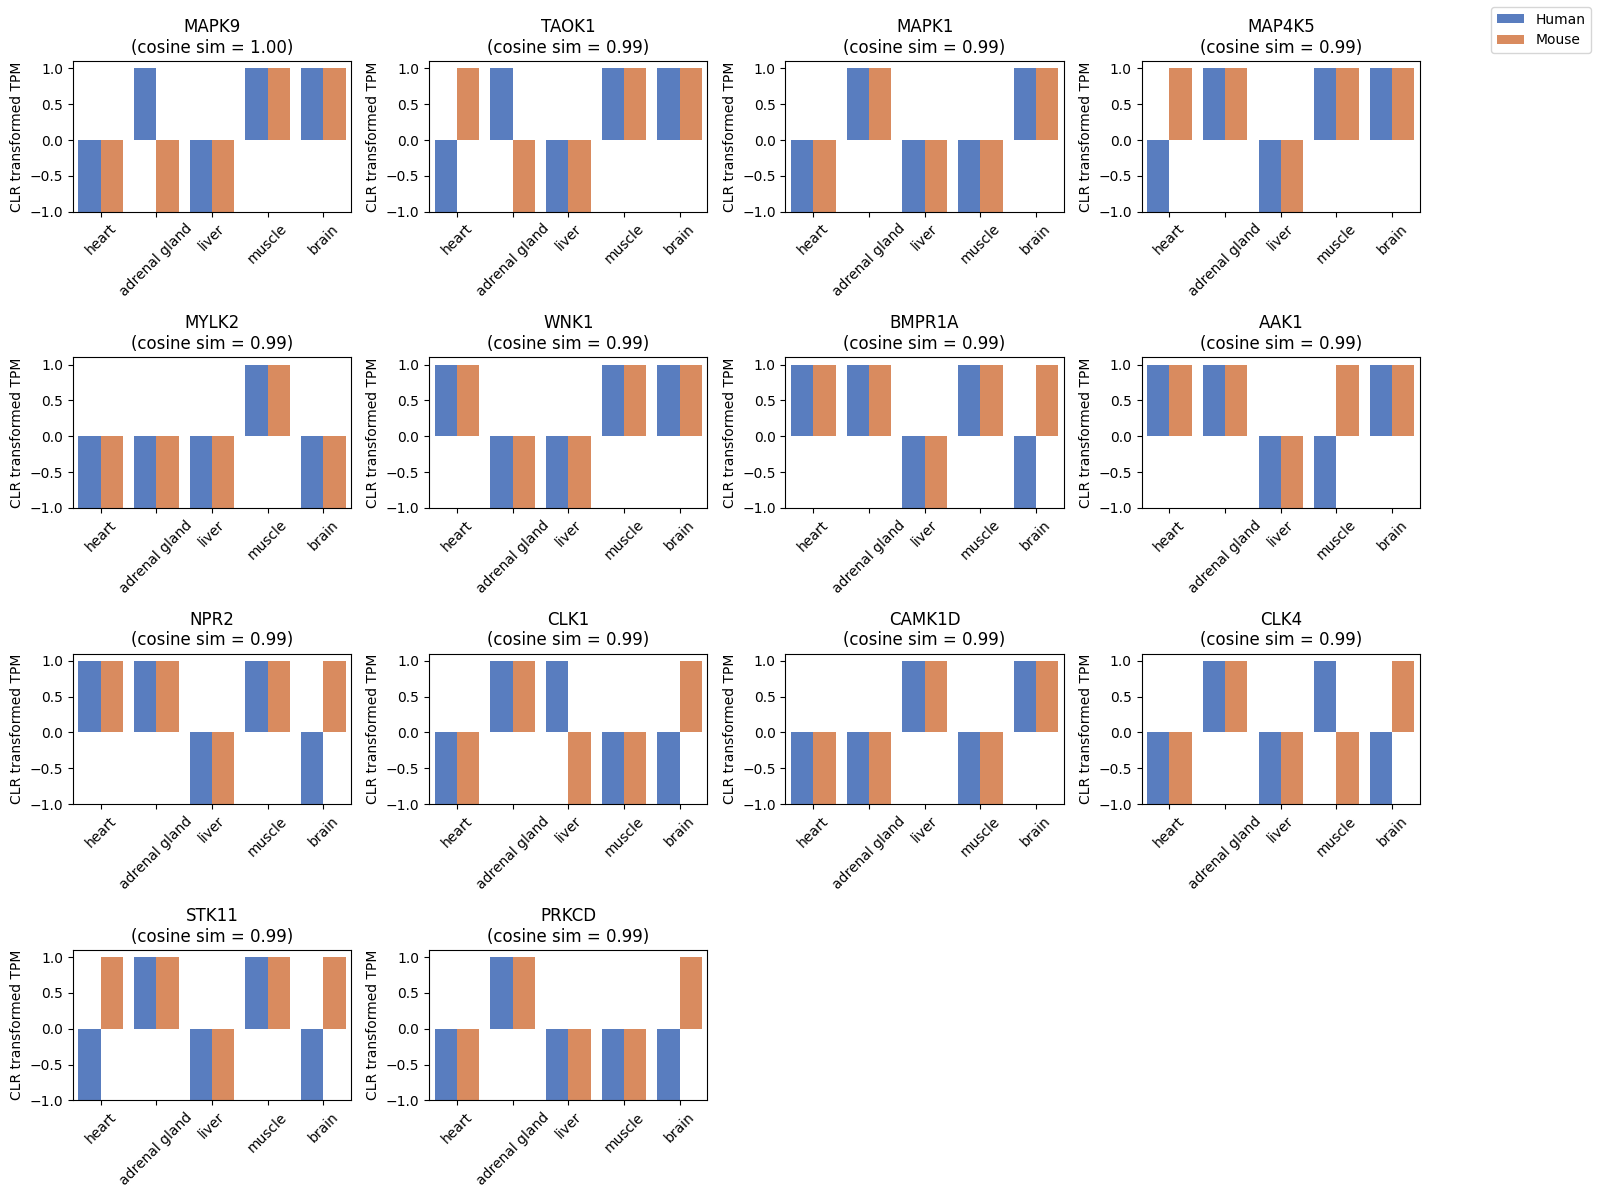

<Figure size 640x480 with 0 Axes>

In [190]:
# Orthologs high similarity (transformed with clr)
orthologs_highsim = orthologs_highsim_simplified.copy()

print(f"Number of orthologs with high expression similarity (cosine) > 0.98: {orthologs_highsim.shape[0]}")

# assume orthologs_highsim is your DataFrame of 15 genes
tissues = ["heart", "adrenal gland", "liver", "muscle", "brain"]
n_genes = len(orthologs_highsim)
ncols = 4
nrows = (n_genes + ncols - 1) // ncols  # =4
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3), squeeze=False)
axes = axes.flatten()

for ax, (_, row) in zip(axes, orthologs_highsim.iterrows()):
    gene = row["gene_name_human"]
    sim  = row["exp_sim_cosine"]
    
    # build per‐gene long DataFrame
    human_df = pd.DataFrame({
        "tissue": tissues,
        "TPM":    [row[f"{t}_tpm"] for t in tissues],
        "species": "Human"
    })
    mouse_df = pd.DataFrame({
        "tissue": tissues,
        "TPM":    [row[f"{t}_tpm_mouse_simplified"] for t in tissues],
        "species": "Mouse"
    })
    plot_df = pd.concat([human_df, mouse_df], ignore_index=True)
    
    sns.barplot(data=plot_df, x="tissue", y="TPM", hue="species", ax=ax, palette="muted")
    ax.set_title(f"{gene}\n(cosine sim = {sim:.2f})")
    ax.set_xlabel("")
    ax.set_ylabel("CLR transformed TPM")
    ax.set_ylim(-1, plot_df["TPM"].max()*1.1)
    ax.tick_params(axis="x", rotation=45, labelsize=10)
    ax.legend_.remove()   # optionally remove inner legend

# hide any unused axes (e.g. the 16th slot)
for ax in axes[n_genes:]:
    ax.set_visible(False)

# add one legend for all
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right")
plt.tight_layout(rect=[0,0,0.9,1])  # leave room for the legend
plt.show()

# Save the plot
plt.savefig(f'./plots/{family_id}_{transform_method}/orthologs_highsim_expression_similarity.png', dpi=300, bbox_inches='tight')

In [ ]:
orthologs_true_summary = orthologs_true_exp.copy()

# Add a column for the max expression value (human or mouse) It is the max of the last 10 columns
orthologs_true_summary['max_expression'] = orthologs_true_exp.iloc[:, -10:].max(axis=1)

# Add a column for the average expression value (human or mouse) It is the mean of columns 10 to 19, both inclusive
orthologs_true_summary['avg_expression'] = orthologs_true_exp.iloc[:, -10:].mean(axis=1)

# Add a column for the variability of the expression (last 10 columns), calcualted as:
# 1. Calculate Median of the expression values (human or mouse)
# 2. Calculate the absolute difference between each expression value and the median
# 3. Add all terms together except for the maximum value

orthologs_true_summary['expression_variability_softmax'] = orthologs_true_exp.iloc[:, -10:].apply(lambda x: np.sum(np.abs(x - np.median(x))) - np.max(np.abs(x - np.median(x))), axis=1)
# divide by the number of columns - 1 to get the average variability
orthologs_true_summary['expression_variability_softmax_div'] = orthologs_true_summary['expression_variability_softmax']/(orthologs_true_exp.iloc[:, -10:].shape[1] - 1)

orthologs_true_summary['expression_variability'] = orthologs_true_exp.iloc[:, -10:].apply(lambda x: np.sum(np.abs(x - np.median(x))), axis=1)
# divide by the number of columns to get the average variability
orthologs_true_summary['expression_variability_div'] = orthologs_true_summary['expression_variability']/ orthologs_true_exp.iloc[:, -10:].shape[1]

In [ ]:
orthologs_false_summary = orthologs_false_exp.copy()

# Add a column for the max expression value (human or mouse) It is the max of the last 10 columns
orthologs_false_summary['max_expression'] = orthologs_false_exp.iloc[:, -10:].max(axis=1)

# Add a column for the average expression value (human or mouse) It is the mean of columns 10 to 19, both inclusive
orthologs_false_summary['avg_expression'] = orthologs_false_exp.iloc[:, -10:].mean(axis=1)

# Add a column for the variability of the expression (last 10 columns), calcualted as:
# 1. Calculate Median of the expression values (human or mouse)
# 2. Calculate the absolute difference between each expression value and the median
# 3. Add all terms together except for the maximum value

orthologs_false_summary['expression_variability_softmax'] = orthologs_false_exp.iloc[:, -10:].apply(lambda x: np.sum(np.abs(x - np.median(x))) - np.max(np.abs(x - np.median(x))), axis=1)
# divide by the number of columns - 1 to get the average variability
orthologs_false_summary['expression_variability_softmax_div'] = orthologs_false_summary['expression_variability_softmax']/(orthologs_false_exp.iloc[:, -10:].shape[1] - 1)

orthologs_false_summary['expression_variability'] = orthologs_false_exp.iloc[:, -10:].apply(lambda x: np.sum(np.abs(x - np.median(x))), axis=1)
# divide by the number of columns to get the average variability
orthologs_false_summary['expression_variability_div'] = orthologs_false_summary['expression_variability']/ orthologs_false_exp.iloc[:, -10:].shape[1]

orthologs_false_summary

In [36]:
orthologs_true_summary.shape
# Save the summary to a file
orthologs_true_summary.to_csv(f'./results/{family_id}_{transform_method}_orthologs_true_summary.tsv', sep='\t', index=False)

In [37]:
print("Gene with the lowest max expression in orthologs_true_exp:")
print(orthologs_true_exp.loc[orthologs_true_summary['max_expression'].idxmin()])

print("Gene with the highest max expression in orthologs_true_exp:")
print(orthologs_true_exp.loc[orthologs_true_summary['max_expression'].idxmax()])

print("Gene with the lowest average expression in orthologs_true_exp:")
print(orthologs_true_exp.loc[orthologs_true_summary['avg_expression'].idxmin()])

print("Gene with the highest average expression in orthologs_true_exp:")
print(orthologs_true_exp.loc[orthologs_true_summary['avg_expression'].idxmax()])

Gene with the lowest max expression in orthologs_true_exp:
gene_id_human                 ENSG00000129465
gene_id_mouse              ENSMUSG00000022221
gene_name_human                         RIPK3
gene_name_mouse                         RIPK3
orthologs                                True
exp_sim_cosine                       0.959524
exp_sim_pearson                      0.953365
promoter_identity                   49.331104
domain_identity                     70.848708
heart_tpm                            1.748933
adrenal gland_tpm                    1.766465
liver_tpm                             0.86855
muscle_tpm                           0.904681
brain_tpm                            0.445613
heart_tpm_mouse                          1.15
adrenal gland_tpm_mouse                   1.4
liver_tpm_mouse                          0.19
muscle_tpm_mouse                         0.53
brain_tpm_mouse                          0.27
Name: 18700, dtype: object
Gene with the highest max expression in 

Text(0.5, 1.0, 'Max Expression vs Expression Similarity (cosine) for Orthologs = True')

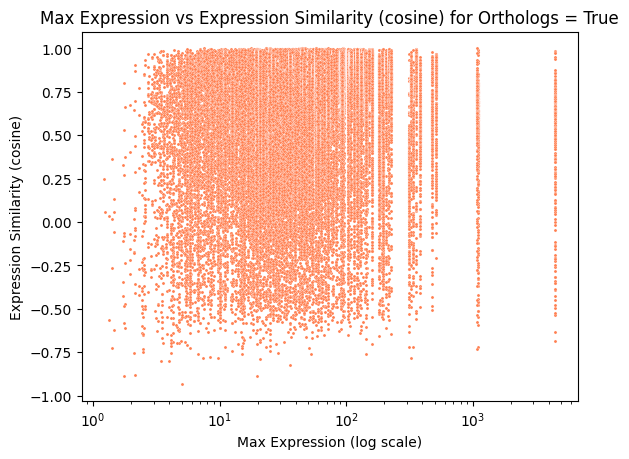

In [191]:
# Plot log (max expression) against expression similarity (cosine)
plt.figure()
#sns.scatterplot(data=orthologs_true_summary, x='max_expression', y='exp_sim_cosine', alpha=1, s=5, color='blue')
sns.scatterplot(data=orthologs_false_summary, x='max_expression', y='exp_sim_cosine', alpha=1, s=5, color='coral')
plt.xscale('log')
plt.xlabel('Max Expression (log scale)')
plt.ylabel('Expression Similarity (cosine)')
plt.title('Max Expression vs Expression Similarity (cosine) for Orthologs = True')


Text(0.5, 1.0, 'Expression variability (soft) / n-1 vs Expression Similarity (cosine) for Orthologs = True')

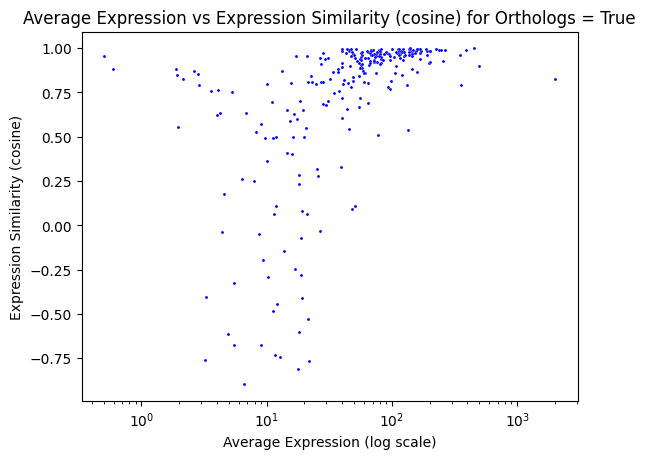

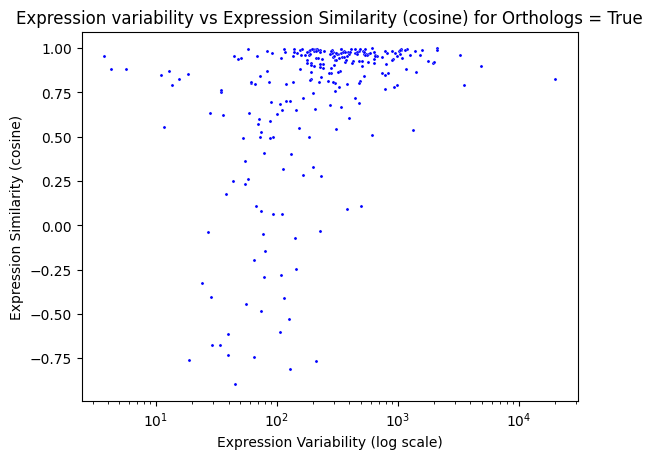

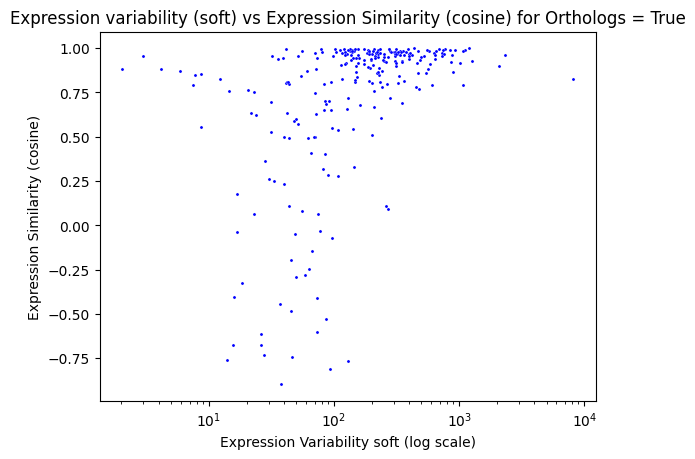

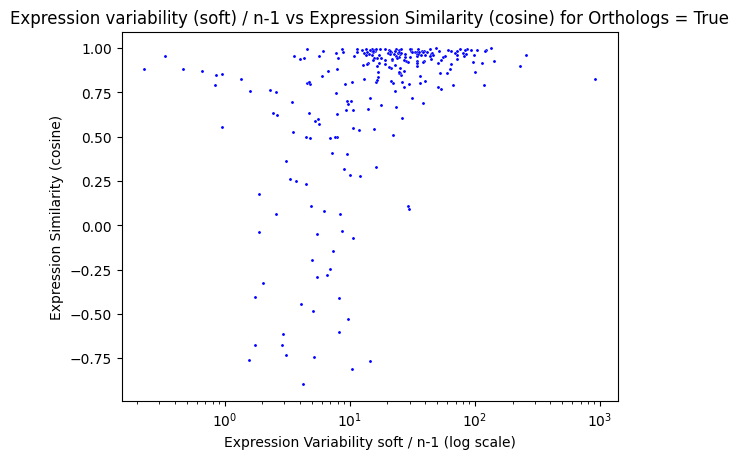

In [315]:
# Print average expression against expression similarity (cosine)
plt.figure()
sns.scatterplot(data=orthologs_true_summary, x='avg_expression', y='exp_sim_cosine', alpha=1, s=5, color='blue')
plt.xscale('log')
plt.xlabel('Average Expression (log scale)')
plt.ylabel('Expression Similarity (cosine)')
plt.title('Average Expression vs Expression Similarity (cosine) for Orthologs = True')


plt.figure()
sns.scatterplot(data=orthologs_true_summary, x='expression_variability', y='exp_sim_cosine', alpha=1, s=5, color='blue')
plt.xscale('log')
plt.xlabel('Expression Variability (log scale)')
plt.ylabel('Expression Similarity (cosine)')
plt.title('Expression variability vs Expression Similarity (cosine) for Orthologs = True')

plt.figure()
sns.scatterplot(data=orthologs_true_summary, x='expression_variability_softmax', y='exp_sim_cosine', alpha=1, s=5, color='blue')
plt.xscale('log')
plt.xlabel('Expression Variability soft (log scale)')
plt.ylabel('Expression Similarity (cosine)')
plt.title('Expression variability (soft) vs Expression Similarity (cosine) for Orthologs = True')

plt.figure()
sns.scatterplot(data=orthologs_true_summary, x='expression_variability_softmax_div', y='exp_sim_cosine', alpha=1, s=5, color='blue')
plt.xscale('log')
plt.xlabel('Expression Variability soft / n-1 (log scale)')
plt.ylabel('Expression Similarity (cosine)')
plt.title('Expression variability (soft) / n-1 vs Expression Similarity (cosine) for Orthologs = True')

In [ ]:
# print gene with the lowest expression similarity (cosine)
print("Gene with the lowest expression similarity (cosine):")
print(orthologs_true_summary.loc[orthologs_true_summary['exp_sim_cosine'].idxmin()])


Gene with the lowest expression similarity (cosine):
gene_id_human                            ENSG00000134602
gene_id_mouse                         ENSMUSG00000031112
gene_name_human                                    STK26
gene_name_mouse                                    STK26
orthologs                                           True
exp_sim_cosine                                 -0.898242
exp_sim_pearson                                -0.861614
promoter_identity                              50.793651
domain_identity                                99.601594
Brain                                           1.405255
Cerebellum                                      11.73616
Heart                                            0.20401
Kidney                                           5.78381
Liver                                          10.377921
Brain_mouse                                    13.263933
Cerebellum_mouse                                1.820793
Heart_mouse                        

TypeError: cannot do slice indexing on Index with these indexers [-10] of type int

<Figure size 640x480 with 0 Axes>

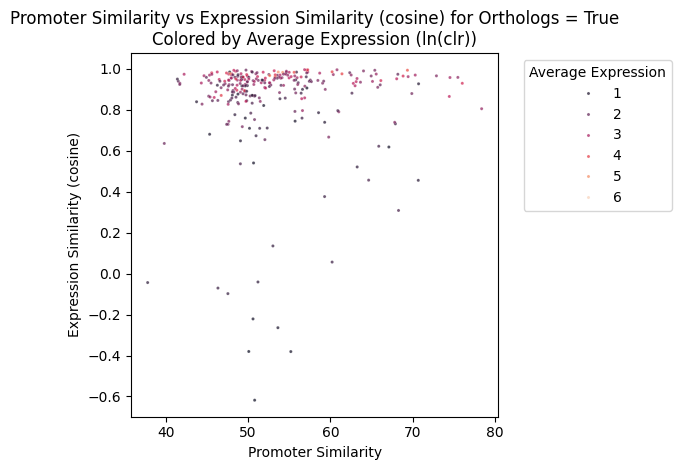

In [53]:
# Plot sequence similarity against expression similarity (cosine) colored by average expression
# Add ln(average expression) to the orthologs_true_summary
orthologs_true_summary['ln_avg_expression'] = np.log(orthologs_true_summary['avg_expression'] + 1)  # Adding 1 to avoid log(0)
orthologs_false_summary['ln_avg_expression'] = np.log(orthologs_false_summary['avg_expression'] + 1)  # Adding 1 to avoid log(0)
plt.figure()
sns.scatterplot(data=orthologs_true_summary, x='promoter_identity', y='exp_sim_cosine', 
                hue= 'ln_avg_expression', palette='rocket', alpha=0.7, s=5)
#sns.scatterplot(data=orthologs_false_summary, x='promoter_identity', y='exp_sim_cosine', 
                #hue= 'ln_avg_expression', palette='rocket', alpha=0.7, s=5)
#sns.scatterplot(data=orthologs_false_summary, x='promoter_identity', y='exp_sim_cosine', 
                #hue='avg_expression', palette='viridis', alpha=0.7, s=5)
plt.xlabel('Promoter Similarity')
plt.ylabel('Expression Similarity (cosine)')
plt.title(f'Promoter Similarity vs Expression Similarity (cosine) for Orthologs = True\nColored by Average Expression (ln({transform_method}))')
plt.legend(title='Average Expression', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(f'./plots/{family_id}_{transform_method}/promoter_vs_exp_sim_cos_cosine_colored_by_avg_expression.png', dpi=300, bbox_inches='tight')

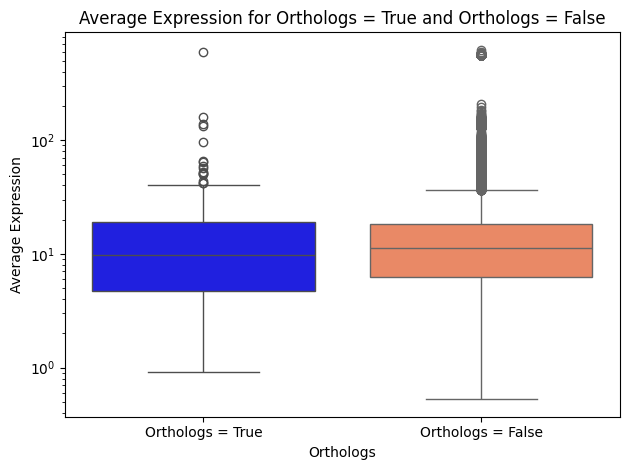

In [62]:
# Boxplot of average expression for orthologs = True and orthologs = False
plt.figure()
sns.boxplot(data=orthologs_true_summary, x='orthologs', y='avg_expression', color = 'blue')
sns.boxplot(data=orthologs_false_summary, x='orthologs', y='avg_expression', color = 'coral')

plt.xlabel('Orthologs')
plt.ylabel('Average Expression')
plt.title('Average Expression for Orthologs = True and Orthologs = False')
plt.xticks([0, 1], ['Orthologs = True', 'Orthologs = False'])
plt.yscale('log')
plt.tight_layout()
#plt.savefig(f'./plots/{family_id}_{transform_method}/avg_expression_boxplot.png',

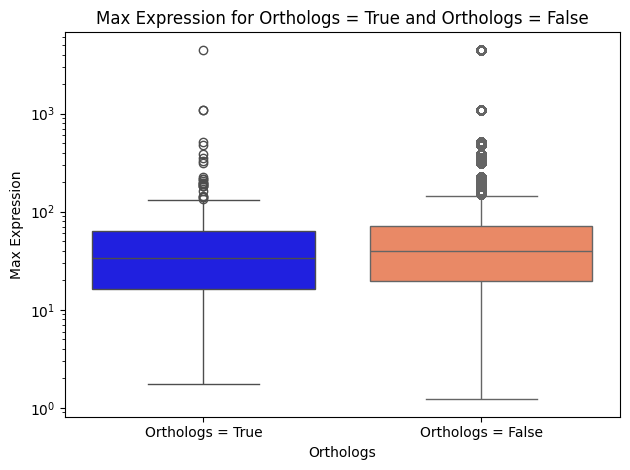

In [59]:
# Boxplot of max expression for orthologs = True and orthologs = False
plt.figure()
sns.boxplot(data=orthologs_true_summary, x='orthologs', y='max_expression', color = 'blue')
sns.boxplot(data=orthologs_false_summary, x='orthologs', y='max_expression', color = 'coral')
plt.xlabel('Orthologs')
plt.ylabel('Max Expression')
plt.title('Max Expression for Orthologs = True and Orthologs = False')  
plt.xticks([0, 1], ['Orthologs = True', 'Orthologs = False'])
plt.yscale('log')
plt.tight_layout()
#plt.savefig(f'./plots/{family_id}_{transform_method}/max_expression_boxplot.png', dpi=300, bbox_inches='tight')

In [98]:
# Boxplot of average expression 
h = 'hello'

# Is the expression similarity direclty related to the absolute expression range, rather than the pattern of expression across tissues?
1. Extract df of genes in human (gene_id, gene_name and the 5 tissues)
2. Calculate average and max expression value for each gene
3. Group by expression range (avg/max) and plot distribution (boxplot) of expression similarity. 

In [80]:
# Take the orthologs_true_summary and remove the columns with _mouse 
orthologs_true_exp_human = orthologs_true.merge(human_exp, left_on='gene_id_human', right_index=True, suffixes=('', '_human'))
orthologs_true_exp_human.head()

orthologs_true_exp_human_summary = orthologs_true_exp_human.copy()
# Last 5 columns are the human expression data. Calculate the average expression for each gene
orthologs_true_exp_human_summary['avg_expression_human'] = orthologs_true_exp_human.iloc[:, -5:].mean(axis=1)
# Last 5 columns are the human expression data. Calculate the max expression for each gene
orthologs_true_exp_human_summary['max_expression_human'] = orthologs_true_exp_human.iloc[:, -5:].max(axis=1)

# print mean, min, max, first quartile, second queartile of the average expression for orthologs = True
print("Average expression (human) for orthologs = True:")
print(f"Mean: {orthologs_true_exp_human_summary['avg_expression_human'].mean()}")
print(f"Min: {orthologs_true_exp_human_summary['avg_expression_human'].min()}")
print(f"Max: {orthologs_true_exp_human_summary['avg_expression_human'].max()}")
print(f"First quartile: {orthologs_true_exp_human_summary['avg_expression_human'].quantile(0.25)}")
print(f"Second quartile: {orthologs_true_exp_human_summary['avg_expression_human'].quantile(0.5)}")
print(f"Third quartile: {orthologs_true_exp_human_summary['avg_expression_human'].quantile(0.75)}")

# Add an extra column that indicates the range of the average expression: very low (< 1), low (1-10), medium (10-50), high (50-100), very high (> 100)
def expression_range(value):
    if value < 1:
        return 'very low (< 1 tpm)'
    elif value < 10:
        return 'low (1-10 tpm)'
    elif value < 50:
        return 'medium (10-50 tpm)'
    elif value < 100:
        return 'high (50-100 tpm)'
    else:
        return 'very high (> 100 tpm)'
    
orthologs_true_exp_human_summary['avg_expression_range'] = orthologs_true_exp_human_summary['avg_expression_human'].apply(expression_range)


Average expression (human) for orthologs = True:
Mean: 10.505741816221684
Min: 0.5912048233918491
Max: 131.91420301179744
First quartile: 3.2570741887841392
Second quartile: 6.376131427801608
Third quartile: 13.273441708193522


/var/folders/bl/l7t7_f5x4g91gq6j4f_wtdb00000gn/T/ipykernel_92571/2643277861.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=orthologs_true_exp_human_summary, x='avg_expression_range',y='exp_sim_cosine',palette='viridis',order=order)


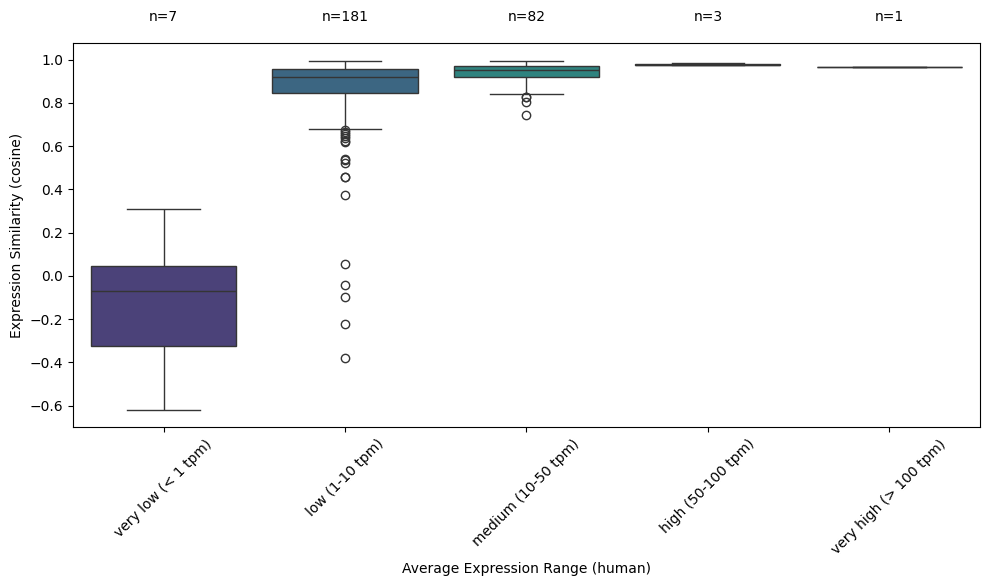

In [ ]:
# define your desired order
order = ['very low (< 1 tpm)', 'low (1-10 tpm)', 'medium (10-50 tpm)', 'high (50-100 tpm)', 'very high (> 100 tpm)']

# compute counts in that order
counts = orthologs_true_exp_human_summary['avg_expression_range'] \
            .value_counts() \
            .reindex(order)

# draw the boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=orthologs_true_exp_human_summary, x='avg_expression_range',y='exp_sim_cosine',palette='viridis',order=order)

# annotate counts
ymin, ymax = ax.get_ylim()
y_offset = (ymax - ymin) * 0.05   # 5% of y-range above the top
for i, cat in enumerate(order):
    ax.text(
        i,                  # x-position: 0,1,… 
        ymax + y_offset,    # y-position: just above the top of the boxes
        f'n={counts[cat]:,}',  # formatted count
        ha='center',
        va='bottom',
        fontsize=10
    )

ax.set_xlabel('Average Expression Range (human)')
ax.set_ylabel('Expression Similarity (cosine)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [73]:
orthologs_true_exp.head()

# scatter plot of brain against brain_mouse, Liver against Liver_mouse, and Heart against Heart_mouse
plt.figure()
sns.scatterplot(data=orthologs_true_exp, x='Brain', y='Brain_mouse', alpha=0.5, s=5, color='blue')
sns.scatterplot(data=orthologs_true_exp, x='Liver', y='Liver_mouse', alpha=0.5, s=5, color='coral')
sns.scatterplot(data=orthologs_true_exp, x='Heart', y='Heart_mouse', alpha=0.5, s=5, color='green')
sns.scatterplot(data=orthologs_true_exp, x='Kidney', y='Kidney_mouse', alpha=0.5, s=5, color='orange')
sns.scatterplot(data=orthologs_true_exp, x='Cerebellum', y='Cerebellum_mouse', alpha=0.5, s=5, color='purple')

plt.xlabel('Human Expression')
plt.ylabel('Mouse Expression')
plt.title(f'Human vs Mouse Expression for Orthologs (cpm)')
plt.legend(['Brain', 'Liver', 'Heart', 'Kidney', 'Cerebellum'])

# plt.xscale('log')
# plt.yscale('log')

# Compute correlation between human and mouse expression for each tissue
tissues = ['Brain', 'Liver', 'Heart', 'Kidney', 'Cerebellum']
for tissue in tissues:
    corr = orthologs_true_exp[tissue].corr(orthologs_true_exp[f'{tissue}_mouse'])
    print(f'Correlation between {tissue} and {tissue}_mouse: {corr}')



ValueError: Could not interpret value `Brain` for `x`. An entry with this name does not appear in `data`.

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Human vs Mouse Liver Expression for Orthologs (cpm)')

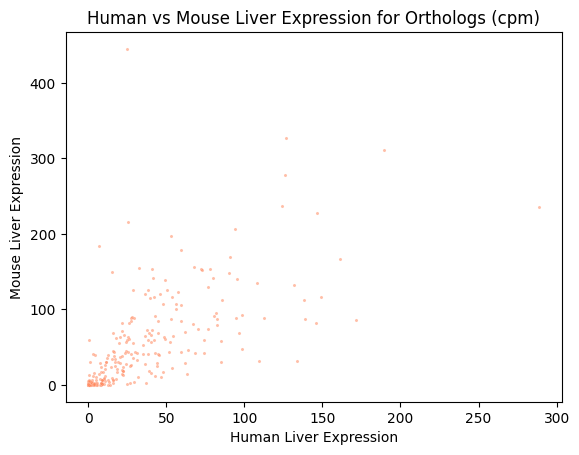

In [ ]:
# For Liver, plot expression of human and mouse for orthologs = True
plt.figure()
sns.scatterplot(data=orthologs_true_exp, x='Liver', y='Liver_mouse', alpha=0.5, s=5, color='coral')
plt.xlabel('Human Liver Expression')
plt.ylabel('Mouse Liver Expression')
plt.title(f'Human vs Mouse Liver Expression for Orthologs (cpm)')



In [ ]:
# calculate the average expression and iqr for each tissue 
def calculate_iqr(series):
    """Calculate the interquartile range (IQR) for a given series."""
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    return q3 - q1

# Calculate average expression and IQR for each tissue
average_expression = orthologs_true_exp[tissues].mean()
iqr_expression = orthologs_true_exp[tissues].apply(calculate_iqr)

print("Average Expression for each tissue:")
print(average_expression)
print("\nIQR Expression for each tissue:")
print(iqr_expression)


Average Expression for each tissue:
Brain         88.086752
Liver         36.086414
Heart         88.156898
Kidney        44.978411
Cerebellum    75.131673
dtype: float64

IQR Expression for each tissue:
Brain         90.185059
Liver         41.384811
Heart         41.465116
Kidney        45.678123
Cerebellum    87.277145
dtype: float64


In [ ]:
# Sort the orthologs df by expression similarity
orthologs_true_sorted = orthologs_true.sort_values(by='exp_sim_cosine', ascending=False)

# Print the top 10 and bottom 10 orthologs by expression similarity
print("Top 10 orthologs by expression similarity (cosine):")
print(orthologs_true_sorted.head(10)[['gene_name_human',  'gene_id_human', 'gene_id_mouse', 'exp_sim_cosine']])
print("Bottom 10 orthologs by expression similarity (cosine):")
print(orthologs_true_sorted.tail(10)[['gene_name_human', 'gene_id_human', 'gene_id_mouse', 'exp_sim_cosine']])

Top 10 orthologs by expression similarity (cosine):
      gene_name_human    gene_id_human       gene_id_mouse  exp_sim_cosine
61696            GRK2  ENSG00000173020  ENSMUSG00000024858        0.999093
5120             WNK1  ENSG00000060237  ENSMUSG00000045962        0.998322
26368           NRBP1  ENSG00000115216  ENSMUSG00000029148        0.997139
45056        CDC42BPA  ENSG00000143776  ENSMUSG00000026490        0.996673
27136           STK25  ENSG00000115694  ENSMUSG00000026277        0.996257
44032            AKT1  ENSG00000142208  ENSMUSG00000001729        0.995781
13824        MAPKAPK5  ENSG00000089022  ENSMUSG00000029454        0.995402
43776           SCYL1  ENSG00000142186  ENSMUSG00000024941        0.995307
46080            TLK2  ENSG00000146872  ENSMUSG00000020694        0.994990
50432           PHKG2  ENSG00000156873  ENSMUSG00000030815        0.994525
Bottom 10 orthologs by expression similarity (cosine):
      gene_name_human    gene_id_human       gene_id_mouse  exp_sim_

In [ ]:


# Top 10 orthologs by expression similarity (cosine)
top_10_human_ids = orthologs_true_sorted.head(10)['gene_id_human'].tolist()
top_10_mouse_ids = orthologs_true_sorted.head(10)['gene_id_mouse'].tolist()

# Bottom 10 orthologs by expression similarity (cosine)
bottom_10_human_ids = orthologs_true_sorted.tail(10)['gene_id_human'].tolist()
bottom_10_mouse_ids = orthologs_true_sorted.tail(10)['gene_id_mouse'].tolist()

In [ ]:
# get the mean expression (per tissue) for the top 10 and bottom 10 orthologs
top_10_human_exp = human_exp.loc[top_10_human_ids].mean(axis=0)
top_10_mouse_exp = mouse_exp.loc[top_10_mouse_ids].mean(axis=0)

bottom_10_human_exp = human_exp.loc[bottom_10_human_ids].mean(axis=0)
bottom_10_mouse_exp = mouse_exp.loc[bottom_10_mouse_ids].mean(axis=0)


In [ ]:
# Row mean (average of each gene)
top_10_human_exp_mean = human_exp.loc[top_10_human_ids].mean(axis=1)
print(f"Top 10 human orthologs mean expression: {top_10_human_exp_mean}")
bottom_10_human_exp_mean = human_exp.loc[bottom_10_human_ids].mean(axis=1)
print(f"Bottom 10 human orthologs mean expression: {bottom_10_human_exp_mean}") 

top_10_mouse_exp_mean = mouse_exp.loc[top_10_mouse_ids].mean(axis=1)
print(f"Top 10 mouse orthologs mean expression: {top_10_mouse_exp_mean}")
bottom_10_mouse_exp_mean = mouse_exp.loc[bottom_10_mouse_ids].mean(axis=1)
print(f"Bottom 10 mouse orthologs mean expression: {bottom_10_mouse_exp_mean}")

Top 10 human orthologs mean expression: gene_id
ENSG00000173020    122.072915
ENSG00000060237    271.757358
ENSG00000115216    114.694400
ENSG00000143776    119.958468
ENSG00000115694    142.774855
ENSG00000142208    150.529849
ENSG00000089022     27.787811
ENSG00000142186    109.992772
ENSG00000146872     30.602784
ENSG00000156873     39.417239
dtype: float64
Bottom 10 human orthologs mean expression: gene_id
ENSG00000134070     7.823910
ENSG00000006837     1.252100
ENSG00000143479     6.832709
ENSG00000135828     7.877768
ENSG00000100749     7.595295
ENSG00000108984     6.323561
ENSG00000142731     1.484652
ENSG00000163673     1.186607
ENSG00000154237    10.350737
ENSG00000134602     5.901431
dtype: float64
Top 10 mouse orthologs mean expression: gene_id
ENSMUSG00000024858    154.889106
ENSMUSG00000045962    629.451311
ENSMUSG00000029148    114.459930
ENSMUSG00000026490    257.663470
ENSMUSG00000026277    177.907223
ENSMUSG00000001729    167.039334
ENSMUSG00000029454     60.067280
EN

/var/folders/bl/l7t7_f5x4g91gq6j4f_wtdb00000gn/T/ipykernel_58440/1079886996.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(values, labels=labels)


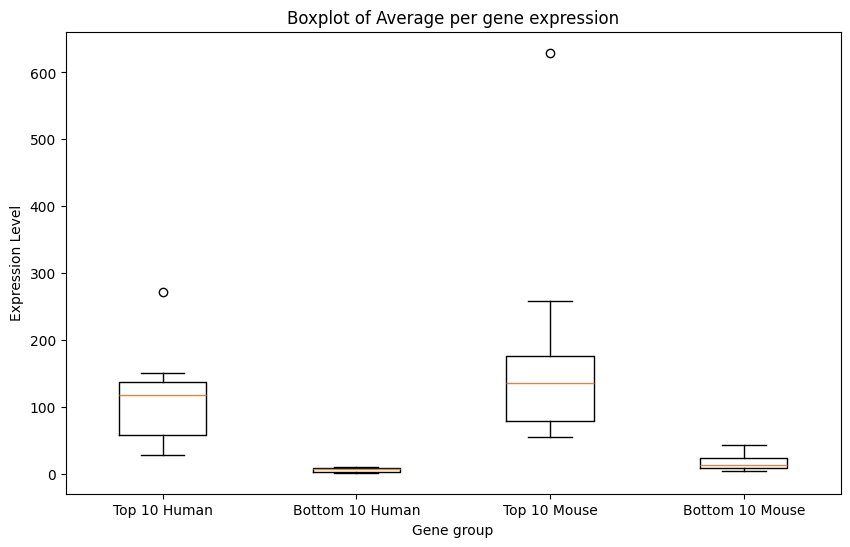

In [ ]:
# Boxplot (4 boxes, one for each group)
plt.figure(figsize=(10, 6))
data = {
    'Top 10 Human': top_10_human_exp_mean,
    'Bottom 10 Human': bottom_10_human_exp_mean,
    'Top 10 Mouse': top_10_mouse_exp_mean,
    'Bottom 10 Mouse': bottom_10_mouse_exp_mean
}
labels = list(data.keys())
values = list(data.values())

# Create boxplot
plt.boxplot(values, labels=labels)
plt.title('Boxplot of Average per gene expression')
plt.ylabel('Expression Level')
plt.xlabel('Gene group')
plt.show()

In [ ]:
type(data)


dict

In [ ]:
[top_10_human_exp_mean, bottom_10_human_exp_mean]

[gene_id
 ENSG00000173020    122.072915
 ENSG00000060237    271.757358
 ENSG00000115216    114.694400
 ENSG00000143776    119.958468
 ENSG00000115694    142.774855
 ENSG00000142208    150.529849
 ENSG00000089022     27.787811
 ENSG00000142186    109.992772
 ENSG00000146872     30.602784
 ENSG00000156873     39.417239
 dtype: float64,
 gene_id
 ENSG00000134070     7.823910
 ENSG00000006837     1.252100
 ENSG00000143479     6.832709
 ENSG00000135828     7.877768
 ENSG00000100749     7.595295
 ENSG00000108984     6.323561
 ENSG00000142731     1.484652
 ENSG00000163673     1.186607
 ENSG00000154237    10.350737
 ENSG00000134602     5.901431
 dtype: float64]

In [ ]:
print("Top 10 human orthologs mean expression:")
print(top_10_human_exp)

print("Top 10 mouse orthologs mean expression:")
print(top_10_mouse_exp)

print("Bottom 10 human orthologs mean expression:")
print(bottom_10_human_exp)
print("Bottom 10 mouse orthologs mean expression:")
print(bottom_10_mouse_exp)

# Print the mean expression for the top 10 and bottom 10 orthologs
print(f"Top 10 human orthologs mean expression per gene: {top_10_human_mean_pergene}")
print(f"Top 10 mouse orthologs mean expression per gene: {top_10_mouse_mean_pergene}")

Top 10 human orthologs mean expression:
Brain         122.052506
Cerebellum    133.956865
Heart         119.315488
Kidney        115.311070
Liver          74.158297
dtype: float64
Top 10 mouse orthologs mean expression:
Brain         184.903628
Cerebellum    205.811006
Heart         237.778696
Kidney        160.732963
Liver         101.258164
dtype: float64
Bottom 10 human orthologs mean expression:
Brain         7.481987
Cerebellum    5.194630
Heart         3.508979
Kidney        5.657285
Liver         6.471505
dtype: float64
Bottom 10 mouse orthologs mean expression:
Brain         16.883868
Cerebellum     9.393410
Heart         12.653716
Kidney        23.730868
Liver         20.110723
dtype: float64
Top 10 human orthologs mean expression per gene: 112.95884501859155
Top 10 mouse orthologs mean expression per gene: 178.09689136816505


In [ ]:
# subset the data to only the top 10 and bottom 10 orthologs
human_top_10 = human_exp.loc[top_10_human_ids]
mouse_top_10 = mouse_exp.loc[top_10_mouse_ids]


Text(0.5, 1.0, 'Expression of ENSG00000134602 (Human) and ENSMUSG00000031112 (Mouse)')

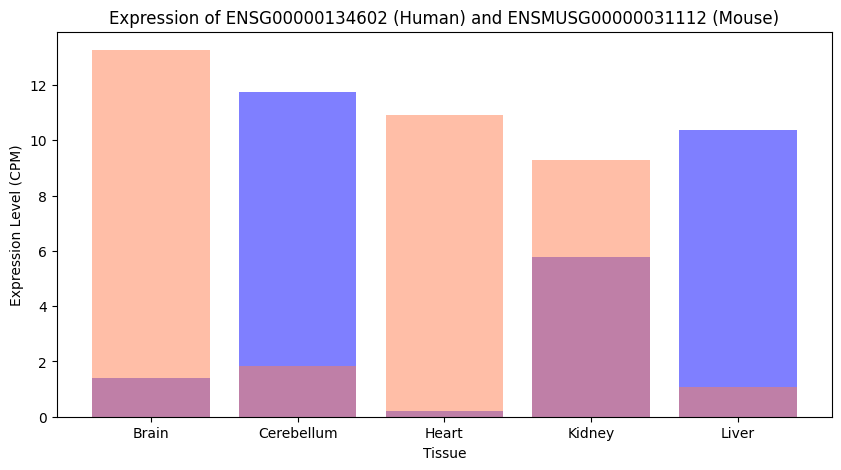

In [ ]:
# Plot the expression of the human gene ENSG00000134602 and mouse gene ENSMUSG00000031112 as  a bar plot
# Each tissue is a different bar, and the y-axis is the expression level
plt.figure(figsize=(10, 5))
human_gene = 'ENSG00000134602'
mouse_gene = 'ENSMUSG00000031112'
human_exp_gene = human_exp.loc[human_gene]
mouse_exp_gene = mouse_exp.loc[mouse_gene]

plt.bar(human_exp_gene.index, human_exp_gene.values, alpha=0.5, label='Human', color='blue')
plt.bar(mouse_exp_gene.index, mouse_exp_gene.values, alpha=0.5, label='Mouse', color='coral')
plt.xlabel('Tissue')
plt.ylabel('Expression Level (CPM)')
plt.title(f'Expression of {human_gene} (Human) and {mouse_gene} (Mouse)')

In [ ]:
combined_df.columns


Index(['gene_id_human', 'gene_id_mouse', 'gene_name_human', 'gene_name_mouse',
       'orthologs', 'exp_sim_cosine', 'exp_sim_pearson', 'promoter_identity',
       'domain_identity', 'label'],
      dtype='object')

In [ ]:
# Sort the dataframe by cosine similarity in decreasing order
merged_df = combined_df.copy()
merged_df = merged_df.sort_values(by="exp_sim_cosine", ascending=False)

# Initialize a list to store the results
results = []

# Iterate over the intervals
for i in np.arange(1, 0.5, -0.01):
    # Define the interval
    interval_df = merged_df[(merged_df["exp_sim_cosine"] <= i) & (merged_df["exp_sim_cosine"] > i - 0.01)]
    
    # Compute the number of orthologs in the interval
    number_orthologs = interval_df["orthologs"].sum()
    total_pairs = len(interval_df)
    
    # Compute the percentage of orthologs in the interval
    percentage_orthologs = number_orthologs / total_pairs if total_pairs > 0 else 0
    
    # Create a contingency table
    contingency_table = [[number_orthologs, total_pairs - number_orthologs], 
                         [merged_df["orthologs"].sum() - number_orthologs, len(merged_df) - total_pairs - (merged_df["orthologs"].sum() - number_orthologs)]]
    
    # Perform the Fisher's exact test
    odds_ratio, pvalue = fisher_exact(contingency_table)
    
    # Append the results to the list
    results.append({
        "Interval": f"{i:.2f}-{i-0.01:.2f}",
        "Number of orthologs": number_orthologs,
        "Total pairs": total_pairs,
        "Percentage of orthologs": percentage_orthologs,
        "Odds ratio": odds_ratio,
        "P-value": pvalue
    })

# Convert the results to a dataframe
results_df = pd.DataFrame(results)

In [ ]:

# Save the results to a file
results_df.to_csv("../results/interval_orthologs_significance.tsv", sep="\t", index=False)
results_df.head(10)


,Interval,Number of orthologs,Total pairs,Percentage of orthologs,Odds ratio,P-value
0,1.00-0.99,23,1457,0.015786,4.378661,2.150309e-08
1,0.99-0.98,20,2258,0.008857,2.377959,7.829744e-04
2,0.98-0.97,21,2249,0.009337,2.519185,3.687939e-04
3,0.97-0.96,17,1954,0.008700,2.317022,2.417522e-03
4,0.96-0.95,15,1596,0.009398,2.497984,1.760138e-03
5,0.95-0.94,6,1443,0.004158,1.062002,8.296029e-01
6,0.94-0.93,10,1290,0.007752,2.024554,3.821394e-02
7,0.93-0.92,6,1261,0.004758,1.219508,6.438208e-01
8,0.92-0.91,8,1258,0.006359,1.645862,1.651442e-01
9,0.91-0.90,3,1173,0.002558,0.647131,6.362816e-01


In [ ]:
# How many pairs have cosine sim and pearson sim higher than threshold?
cos_sim_threshold = 0.94
pearson_cor_threshold = 0.5

cos_sim_pairs = combined_df[(combined_df['exp_sim_cosine'] > cos_sim_threshold) & (combined_df['exp_sim_pearson'] > pearson_cor_threshold)]
print('Number of pairs with cosine similarity > 0.94 and pearson similarity > 0.5: ', len(cos_sim_pairs))

# What should be the lower threshold for cosine similarity to have the same number of pairs as above?
cos_sim_lower = 0.5
pearson_lower = 0.25
cos_sim_pairs = combined_df[(combined_df['exp_sim_cosine'] < cos_sim_lower) & (combined_df['exp_sim_pearson'] < pearson_lower)]
print(f'Number of pairs with cosine similarity < {cos_sim_lower} and pearson similarity < {pearson_lower}: ', len(cos_sim_pairs))

Number of pairs with cosine similarity > 0.94 and pearson similarity > 0.5:  4211
Number of pairs with cosine similarity < 0.5 and pearson similarity < 0.25:  20017


In [ ]:
# Add a column to the data frame named "label" that is P if the pair has cos_sim > 0.94 and pearson > 0.5; N if cos_sim < 0.5 and pearson < 0.25 and U otherwise
combined_df['label'] = 'U'
combined_df.loc[(combined_df['exp_sim_cosine'] > cos_sim_threshold) & (combined_df['exp_sim_pearson'] > pearson_cor_threshold), 'label'] = 'P'
combined_df.loc[(combined_df['exp_sim_cosine'] < cos_sim_lower) & (combined_df['exp_sim_pearson'] < pearson_lower), 'label'] = 'N'

# Save the data frame to a file
combined_df.to_csv('../results/kinase_combined_similarity_labelled.tsv', sep = '\t', index = False)

In [ ]:
# Select the bottom 5000 pairs of combined_df
combined_df_bottom = combined_df.tail(5000)["label"]
combined_df_bottom

54786    N
36752    N
19274    N
40832    N
34655    N
        ..
56868    N
12472    N
35677    N
43478    N
32133    N
Name: label, Length: 5000, dtype: object

In [ ]:
# Another way of defining positive and negative
combined_df['label'] = 'U'
# Sort by exp_sim_cosine and label the top 5000 as positive
combined_df = combined_df.sort_values(by='exp_sim_cosine', ascending = False)

# top 5000 pairs
combined_df.loc[combined_df.index[:5000], 'label'] = 'P'

# bottom 5000 pairs
combined_df.loc[combined_df.index[-5000:], 'label'] = 'N'

# COunt the number of positive and negative pairs
print(combined_df['label'].value_counts())
# Save the data frame to a file
combined_df.to_csv('./results/kinase_combined_similarity_topbottom.tsv', sep = '\t', index = False)

label
U    55025
P     5000
N     5000
Name: count, dtype: int64


In [ ]:
# One last approach, define positive and negative randomly 
combined_df['label'] = 'U'
# Filter the df to 10000 random pairs
random_df_labeled = combined_df.sample(10000)
random_df_unlabeled = combined_df.drop(random_df_labeled.index)

# Label the random pairs randomly as P or N
random_df_labeled.loc[np.random.choice(random_df_labeled.index, 5000, replace = False), 'label'] = 'P'
random_df_labeled.loc[np.random.choice(random_df_labeled.index, 5000, replace = False), 'label'] = 'N'

# Randomly select 5000 pairs
combined_df.loc[np.random.choice(combined_df.index, 5000, replace = False), 'label'] = 'P'
# Randomly select 5000 pairs
combined_df.loc[np.random.choice(combined_df.index, 5000, replace = False), 'label'] = 'N'

# Count the number of positive and negative pairs
print(combined_df['label'].value_counts())

# Save the data frame to a file
combined_df.to_csv('./results/kinase_combined_similarity_random.tsv', sep = '\t', index = False)

label
U    55423
N     5000
P     4602
Name: count, dtype: int64


# Let's see if the model has learned something

In [40]:
# Load the results of the model
all_results = pd.read_csv('../results/all_pairs_all_metrics_random.tsv', sep = '\t', index_col = 0)
all_results.shape

# Load the train pairs
train_pairs = pd.read_csv('../results/train_pairs_random.tsv', sep = '\t')
train_pairs.shape

# Extract a list of the pairs that are in the train set (gene_id_human, gene_id_mouse)
train_pairs_list = list(zip(train_pairs['gene_id_human'], train_pairs['gene_id_mouse']))

# Add a column to all_results that is True if the pair is in the train set and False otherwise
all_results['train'] = all_results.apply(lambda x: (x['gene_id_human'], x['gene_id_mouse']) in train_pairs_list, axis = 1)

FileNotFoundError: [Errno 2] No such file or directory: '../results/all_pairs_all_metrics_random.tsv'

In [ ]:
# Divide the data frame into train and the rest
train_results = all_results[all_results['train']]
notrain_results = all_results[~all_results['train']]
print(train_results.shape, notrain_results.shape)

# The test results, divide them into positive/negative and unknown (label column)
pos_neg = notrain_results[notrain_results['label'] != 'U'] # validation and test set
unknown = notrain_results[notrain_results['label'] == 'U']
print(pos_neg.shape, unknown.shape)




(7000, 14) (60600, 14)
(3000, 14) (57600, 14)


Text(0.5, 1.0, 'Embedding similarity vs Expression similarity (cosine)')

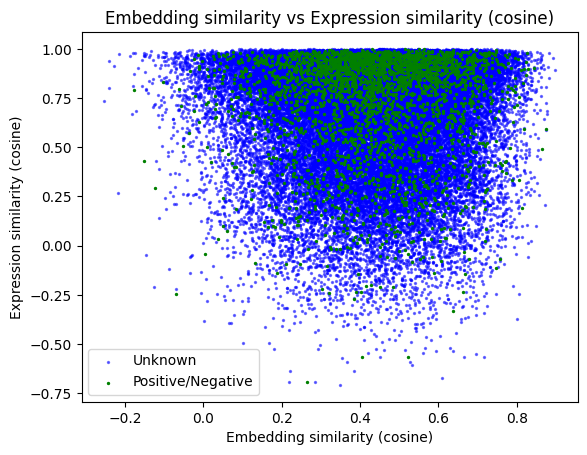

In [ ]:
# Plot a scatter plot of emb_sim_cosine against exp_sim_cosing for the train and test sets
plt.figure()
plt.scatter(unknown['emb_sim_cos'], unknown['exp_sim_cosine'], s=2, alpha=0.5, c = 'blue')
plt.scatter(pos_neg['emb_sim_cos'], pos_neg['exp_sim_cosine'], s=2, alpha=1, c = 'green')
plt.legend(['Unknown', 'Positive/Negative'])
plt.xlabel('Embedding similarity (cosine)')
plt.ylabel('Expression similarity (cosine)')
plt.title('Embedding similarity vs Expression similarity (cosine)')

In [ ]:
# compute pearsin correlation between emb_sim_cos and exp_sim_cos for the train and test sets
pearson_train = train_results['emb_sim_cos'].corr(train_results['exp_sim_cosine'])
pearson_test = notrain_results['emb_sim_cos'].corr(notrain_results['exp_sim_cosine'])
print('Pearson correlation between emb_sim_cos and exp_sim_cos for train set: ', pearson_train)
print('Pearson correlation between emb_sim_cos and exp_sim_cos for non training set: ', pearson_test)


Pearson correlation between emb_sim_cos and exp_sim_cos for train set:  0.011261210884578744
Pearson correlation between emb_sim_cos and exp_sim_cos for non training set:  0.013146319813166826


In [ ]:
all_results = all_results.sort_values(by = ["gene_id_human", "emb_sim_cos"], ascending = [True, False])

all_unique = all_results.drop_duplicates(subset = "gene_id_human", keep = "first")
all_unique = all_results.groupby('gene_id_human').head(2)
# Count the number of True in the orthologs column
all_unique["orthologs"].value_counts()

orthologs
False    255
True       5
Name: count, dtype: int64

In [ ]:
# Same only with the pos/neg pairs
pos_neg_unique = pos_neg.sort_values(by = ["gene_id_human", "emb_sim_cos"], ascending = [True, False])
pos_neg_unique = pos_neg.drop_duplicates(subset = "gene_id_human", keep = "first")
print(pos_neg_unique["orthologs"].value_counts())
pos_neg_unique = pos_neg.groupby('gene_id_human').head(2)
# Count the number of True in the orthologs column
print(pos_neg_unique["orthologs"].value_counts())


orthologs
False    259
True       1
Name: count, dtype: int64
orthologs
False    516
True       3
Name: count, dtype: int64


In [ ]:
all_unique = all_results.groupby('gene_id_human').head(100)
# Count the number of True in the orthologs column
all_unique["orthologs"].value_counts()

orthologs
False    25853
True       147
Name: count, dtype: int64

# Explore embedding similarity

Text(0.5, 1.0, 'Embedding similarity (cosine)')

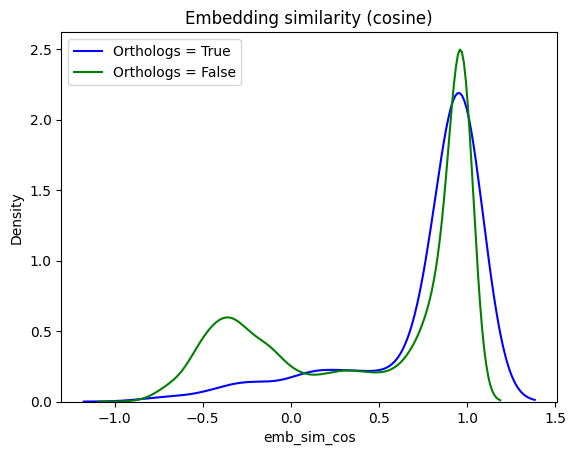

In [ ]:
# Load results
all_results = pd.read_csv('../results/model_pairs/all_pairs_all_metrics_topbottom.tsv', sep = '\t', index_col = 0)
train_pairs = pd.read_csv('../results/model_pairs/train_pairs_topbottom.tsv', sep = '\t')


# Plot density of emb_sim_cos for orthologs and non-orthologs
plt.figure()
sns.kdeplot(all_results[all_results['orthologs'] == True]['emb_sim_cos'], color = "blue", label = "orthologs")
sns.kdeplot(all_results[all_results['orthologs'] == False]['emb_sim_cos'], color = "green", label = "non-orthologs")
plt.legend(['Orthologs = True', 'Orthologs = False'])
plt.title('Embedding similarity (cosine)')


In [ ]:
# Add a new column [model] to pairs_df and initialize it with 'None'
pairs_df['model'] = 'None'

# Create sets of pairs for training, validation, and test
training_pairs = set(zip(training_df['gene_id_human'], training_df['gene_id_mouse']))
validation_pairs = set(zip(validation_df['gene_id_human'], validation_df['gene_id_mouse']))
test_pairs = set(zip(test_df['gene_id_human'], test_df['gene_id_mouse']))

# Update the [model] column based on the membership in training, validation, or test sets
pairs_df['model'] = pairs_df.apply(
    lambda x: 'training' if (x['gene_id_human'], x['gene_id_mouse']) in training_pairs else
              'validation' if (x['gene_id_human'], x['gene_id_mouse']) in validation_pairs else
              'test' if (x['gene_id_human'], x['gene_id_mouse']) in test_pairs else 'None',
    axis=1
)